## **1. Importing packages**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split

## **2. Importing data**

In [ ]:
loans_backup = pd.read_csv("Loan_status_2007-2020Q3.gzip")

In [3]:
loans = loans_backup.copy()

## **3. Data preprocessing**

### 3.1 First look at the data

In [4]:
pd.options.display.max_rows = None

In [5]:
pd.options.display.max_columns = None

In [6]:
inn_size = loans.size
inn_size

415420006

In [7]:
loans.head()

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
0,0,1077501,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,735.0,739.0,1.0,NaN,NaN,3.0,0.0,13648.0,83.7%,9.0,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.0,0.00,Jan-2015,171.62,NaN,May-2020,704.0,700.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,1,1077430,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0.0,Apr-1999,740.0,744.0,5.0,NaN,NaN,3.0,0.0,1687.0,9.4%,4.0,f,0.0,0.0,1014.530000,1014.53,456.46,435.17,0.00,122.9,1.11,Apr-2013,119.66,NaN,Oct-2016,499.0,0.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,2,1077175,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,735.0,739.0,2.0,NaN,NaN,2.0,0.0,2956.0,98.5%,10.0,f,0.0,0.0,3

In [8]:
loans.tail()

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
2925488,105446,102556443,24000.0,24000.0,24000.0,60 months,23.99%,690.30,E,E2,Senior Escrow Officer,< 1 year,RENT,107000.0,Source Verified,Apr-2017,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,other,Other,801xx,CO,11.65,3.0,Apr-1995,670.0,674.0,1.0,4.0,73.0,13.0,2.0,9688.0,24.9%,24.0,f,0.0,0.0,7749.830000,7749.83,2561.41,5188.42,0.00,0.00,0.0000,Mar-2018,690.30,NaN,May-2020,504.0,500.0,1.0,8.0,1.0,Individual,NaN,NaN,NaN,0.0,0.0,60812.0,2.0,1.0,1.0,3.0,4.0,51124.0,NaN,1.0,5.0,3454.0,25.0,38900.0,1.0,0.0,2.0,8.0,5528.0,20859.0,26.0,1.0,0.0,90.0,263.0,6.0,4.0,0.0,18.0,NaN,4.0,4.0,1.0,4.0,7.0,6.0,11.0,5.0,12.0,18.0,7.0,13.0,0.0,0.0,1.0,2.0,87.5,0.0,1.0,1.0,103322.0,60812.0,28200.0,64422.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2925489,105447,102653304,10000.0,10000.0,10000.0,36 months,7.99%,313.32,A,A5,Rn,10+ years,MORTGAGE,65000.0,Source Verified,Apr-2017,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,187xx,PA,19.55,1.0,Sep-1993,725.0,729.0,0.0,12.0,NaN,15.0,0.0,9751.0,15.7%,27.0,w,0.0,0.0,11233.834658,11233.83,10000.00,1233.83,0.00,0.00,0.0000,Oct-2019,2151.99,NaN,Oct-2019,769.0,765.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,55863.0,1.0,2.0,0.0,0.0,45.0,46112.0,50.0,2.0,3.0,3043.0,20.0,62100.0,0.0,0.0,0.0,3.0,3724.0,26229.0,24.6,0.0,0.0,154.0,282.0,1.0,1.0,0.0,1.0,12.0,17.0,12.0,0.0,4.0,8.0,7.0,12.0,4.0,13.0,23.0,8.0,15.0,0.0,0.0,0.0,2.0,92.6,14.3,0.0,0.0,132303.0,55863.0,34800.0,70203.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2925490,105448,102628603,10050.0,10050.0,10050.0,36 months,16.99%,358.26,D,D1,Sales Associat

In [10]:
loans.drop(columns="Unnamed: 0", inplace=True)
loans.set_index("id", inplace=True)

In [11]:
len(loans.columns.values)

140

In [12]:
loans.isnull().sum()

loan_amnt                                           1
funded_amnt                                         1
funded_amnt_inv                                     1
term                                                1
int_rate                                            1
installment                                         1
grade                                               1
sub_grade                                           1
emp_title                                      264087
emp_length                                     205221
home_ownership                                      1
annual_inc                                          5
verification_status                                 1
issue_d                                             1
loan_status                                         1
pymnt_plan                                          1
url                                                 1
purpose                                             1
title                       

In [13]:
loans = loans[~np.isnan(loans["loan_amnt"])].copy()

### 3.3 Dropping column having > 30% values missing

In [14]:
columns = pd.DataFrame(
    round((loans.isna().sum() / (loans.count() + loans.isna().sum()) * 100), 2),
    columns=["perc_miss_val"]
)

In [15]:
columns = columns.reset_index().rename(columns={"index": "column"})

In [16]:
columns

,column,perc_miss_val
0,loan_amnt,0.00
1,funded_amnt,0.00
2,funded_amnt_inv,0.00
3,term,0.00
4,int_rate,0.00
5,installment,0.00
6,grade,0.00
7,sub_grade,0.00
8,emp_title,9.03
9,emp_length,7.01


In [17]:
loans.drop(columns=columns[columns["perc_miss_val"] >= 30]["column"].to_list(), inplace=True)

In [18]:
len(loans.columns.values)

103

### **3.4 Data cleaning and transforming related to datatypes**

#### **3.4.1 Defaulted and not defaulted**

To see how variables impact defaulting `loan_status` column needs to be updated and correctly indicate weather client defaulted or not. 

In [19]:
loans["loan_status"].value_counts(normalize=True)

loan_status
Fully Paid                                             0.511976
Current                                                0.352425
Charged Off                                            0.123927
Late (31-120 days)                                     0.005522
In Grace Period                                        0.003428
Late (16-30 days)                                      0.000929
Issued                                                 0.000705
Does not meet the credit policy. Status:Fully Paid     0.000680
Does not meet the credit policy. Status:Charged Off    0.000260
Default                                                0.000148
Name: proportion, dtype: float64

In [20]:
loans["loan_status"] = np.where(
    loans["loan_status"].isin([
        "Charged Off",
        "Late (31-120 days)",
        "Does not meet the credit policy. Status:Charged Off",
        "Default"
    ]),
    0,
    1
)    

In [21]:
loans["loan_status"].value_counts(normalize=True)

loan_status
1    0.870143
0    0.129857
Name: proportion, dtype: float64

In [22]:
loans.rename(columns={"loan_status": "good_bad"}, inplace=True)

#### **3.4.2 Transforming variables and correcting datatypes**

In [23]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2925492 entries, 1077501 to 99799684
Columns: 103 entries, loan_amnt to debt_settlement_flag
dtypes: float64(79), int32(1), object(23)
memory usage: 2.3+ GB


In [24]:
loans.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,good_bad,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,total_bal_il,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1077501,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,1,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,735.0,739.0,1.0,3.0,0.0,13648.0,83.7%,9.0,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.0,0.00,Jan-2015,171.62,May-2020,704.0,700.0,0.0,1.0,Individual,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,N,N
1077430,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,0,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0.0,Apr-1999,740.0,744.0,5.0,3.0,0.0,1687.0,9.4%,4.0,f,0.0,0.0,1014.530000,1014.53,456.46,435.17,0.00,122.9,1.11,Apr-2013,119.66,Oct-2016,499.0,0.0,0.0,1.0,Individual,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,N,N
1077175,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,1,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,735.0,739.0,2.0,2.0,0.0,2956.0,98.5%,10.0,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.0,0.00,Jun-2014,649.91,Jun-2017,739.0,735.0,0.0,1.0,Individual,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,N,N
1076863,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,1,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0.0,Feb-1996,690.0,694.0,1.0,10.0,0.0,5598.0,21%,37.0,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.0,0.00,Jan-2015,357.48,Apr-2016,604.0,600.0,0.0,1.0,Individual,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,N,N
1075358,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,1,n,https

#### **Date variables**

Following columns have date values and need to be transformed to "months since" variable:

* `earliest_cr_line`
* `last_pymnt_d`
* `last_credit_pull_d`
* `issue_d`

There are 29 missing values in this column, however, this column is not needed for model. This column is only important for calculating number of months since last credit card, and number of months will be continuous variable, thus it will be easier to fill missing values there

In [25]:
loans["earliest_cr_line"].dtypes

dtype('O')

In [26]:
date_cols = ["earliest_cr_line", "last_pymnt_d", "last_credit_pull_d", "issue_d"]

In [27]:
for col in date_cols:
    loans[col] = pd.to_datetime(loans[col], format="%b-%Y")

In [28]:
loans["earliest_cr_line"].max()

Timestamp('2017-07-01 00:00:00')

Max timestamp of the data is at 2020-12-01, so let's say that we analyze the data in 2020-12-02 and this will be our benchmark.

In [29]:
date_bench = pd.to_datetime("2020-12-02")

In [30]:
(date_bench - loans["earliest_cr_line"]).head()

id
1077501   13119 days
1077430    7916 days
1077175    6971 days
1076863    9071 days
1075358    9102 days
Name: earliest_cr_line, dtype: timedelta64[ns]

In [31]:
for col in date_cols:

    loans["mnths_since_" + col] = ((date_bench - loans[col]).dt.days) / 30

In [32]:
loans.drop(columns=date_cols, inplace=True)

In [33]:
loans[["mnths_since_earliest_cr_line", "mnths_since_last_pymnt_d", "mnths_since_last_credit_pull_d", "mnths_since_issue_d"]].describe()

,mnths_since_earliest_cr_line,mnths_since_last_pymnt_d,mnths_since_last_credit_pull_d,mnths_since_issue_d
count,2.925463e+06,2.920571e+06,2.925417e+06,2.925492e+06
mean,2.458225e+02,2.626303e+01,1.531520e+01,4.670369e+01
std,9.726803e+01,2.222935e+01,1.451867e+01,2.566869e+01
min,4.166667e+01,3.333333e-02,2.066667e+00,3.066667e+00
25%,1.806000e+02,7.166667e+00,7.166667e+00,2.540000e+01
50%,2.303333e+02,1.936667e+01,7.166667e+00,4.370000e+01
75%,2.973333e+02,4.063333e+01,1.833333e+01,6.396667e+01
max,1.068433e+03,1.583333e+02,1.654667e+02,1.644333e+02


#### **Text variables**

Following variables have text values and need to be transformed:

* `int_rate` -> remove "%" sign and change to float
* `term` -> remove "months" and change to int
* `emp_length` -> remove "years" and additional signs and change to int
* `revol_util` -> remove "%" sign and change to float

Following redundant variables will be dropped:

* `url` (it's just link to loan data on the internet)
* `zip_code` (there is `addr_state` column, which will be better for analysis)
* `application_type` (only Individual application has been left)

Following variables will be transformed to lower and will have following and trailing spaces removed:

* `purpose`
* `title`
* `addr_state`
* `emp_title`
* `home_ownership`
* `verification_status`
* `pymnt_plan`
* `initial_list_status`
* `hardship_flag`
* `debt_settlement_flag`

Dropping columns

In [34]:
loans.drop(columns=["url", "zip_code"], inplace=True)

**Removing % signs and changing 2 variables:**

In [35]:
for col in ["int_rate", "revol_util"]:
    loans[col] = loans[col].str.rstrip("%").astype(float)

Removing "months" from `term` and changing to int:

In [36]:
loans["term"].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [37]:
loans["term"] = (loans["term"]
                 .str.lstrip()
                 .str.replace(" months", "")
                 .astype(int)
                )

In [38]:
loans["term"].unique()

array([36, 60])

**Removing "years" and additional signs from `emp_length` and changing to int:**

In [39]:
loans["emp_length"].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

For this convertion to be correct, missing values need to be replaced

<Axes: xlabel='Count', ylabel='emp_length'>

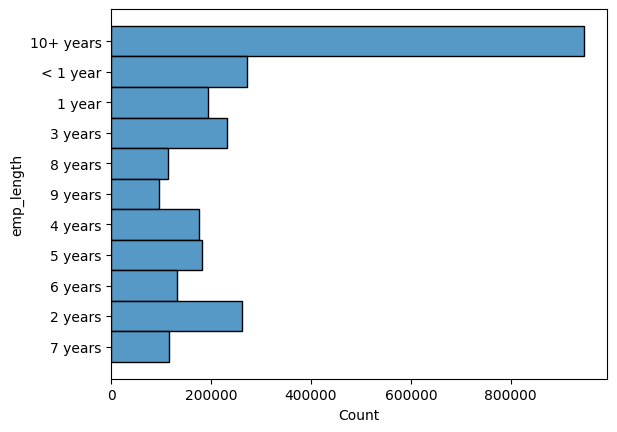

In [40]:
sns.histplot(data=loans, y="emp_length")

In [41]:
loans["emp_length"].fillna("na", inplace=True)

In [42]:
loans.groupby("emp_length")["good_bad"].mean()

emp_length
1 year       0.866786
10+ years    0.877640
2 years      0.870481
3 years      0.868775
4 years      0.869656
5 years      0.871497
6 years      0.871355
7 years      0.867159
8 years      0.860467
9 years      0.862227
< 1 year     0.876241
na           0.840902
Name: good_bad, dtype: float64

In [43]:
loans["emp_length"].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', 'na'],
      dtype=object)

In [44]:
loans["emp_length"] = loans["emp_length"].str.replace("na", "10+ years")

In [45]:
loans.groupby("emp_length")["good_bad"].mean()

emp_length
1 year       0.866786
10+ years    0.871093
2 years      0.870481
3 years      0.868775
4 years      0.869656
5 years      0.871497
6 years      0.871355
7 years      0.867159
8 years      0.860467
9 years      0.862227
< 1 year     0.876241
Name: good_bad, dtype: float64

There are a lot of empty values in this column, and there is no clear way to handle missing values (10+ years is clearly the most common value, but there is approximately the same number of obsrvations in all other columns, and on the other hand, there is too many missing values to just delete those observations). However, this variable could be very important for the model, thus all of missing values will be replaced with "10 + years" value

In [46]:
loans["emp_length"] = (loans["emp_length"]
                           .str.replace("+ years", "")
                           .str.replace(" years", "")
                           .str.replace("< 1 year", "0")
                           .str.replace(" year", "")
                           .str.strip()
                           .astype(int)
                          )

In [47]:
loans["emp_length"].unique()

array([10,  0,  1,  3,  8,  9,  4,  5,  6,  2,  7])

Notice that the percentage of non defaulted clients for "10+ years" dropped from about 87,48% to approximately 86,81%

**Transforming and investigating other text columns:**

In [48]:
text_cols = [
    "purpose",
    "title",
    "addr_state",
    "emp_title",
    "home_ownership",
    "verification_status",
    "pymnt_plan",
    "initial_list_status",
    "application_type",
    "hardship_flag",
    "debt_settlement_flag"
]

In [49]:
for col in text_cols:
    print(f"{col} \n")
    loans[col] = loans[col].str.lower().str.strip()
    print(f"unique values: {loans[col].nunique()}\n")
    print(loans[col].unique())
    print("\n\n")

purpose 

unique values: 14

['credit_card' 'car' 'small_business' 'other' 'wedding'
 'debt_consolidation' 'home_improvement' 'major_purchase' 'medical'
 'moving' 'vacation' 'house' 'renewable_energy' 'educational']



title 

unique values: 51791

['computer' 'bike' 'real estate business' ... 'new kitchen for momma!'
 'new baby and new house (cc consolidate)' 'credit card/auto repair']



addr_state 

unique values: 51

['az' 'ga' 'il' 'ca' 'or' 'nc' 'tx' 'va' 'mo' 'ct' 'ut' 'fl' 'ny' 'pa'
 'mn' 'nj' 'ky' 'oh' 'sc' 'ri' 'la' 'ma' 'wa' 'wi' 'al' 'co' 'ks' 'nv'
 'ak' 'md' 'wv' 'vt' 'mi' 'dc' 'sd' 'nh' 'ar' 'nm' 'mt' 'hi' 'wy' 'ok'
 'de' 'ms' 'tn' 'ia' 'ne' 'id' 'in' 'me' 'nd']



emp_title 

unique values: 470081

[nan 'ryder' 'air resources board' ... 'track repair'
 'emr applications tech' 'contact input']



home_ownership 

unique values: 6

['rent' 'own' 'mortgage' 'other' 'none' 'any']



verification_status 

unique values: 3

['verified' 'source verified' 'not verified']



pymn

In [50]:
loans["title"].value_counts().head(20)

title
debt consolidation           1535986
credit card refinancing       648801
home improvement              182729
other                         165855
major purchase                 57393
medical expenses               33310
car financing                  26343
business                       26209
vacation                       19323
home buying                    18193
moving and relocation          17590
consolidation                   8142
debt consolidation loan         4824
credit card consolidation       3661
personal loan                   3418
consolidation loan              2691
credit card payoff              2574
credit card refinance           2539
consolidate                     2190
personal                        2154
Name: count, dtype: int64

In [51]:
loans["emp_title"].value_counts().head(20)

emp_title
teacher               62223
manager               58549
owner                 37704
registered nurse      30632
driver                29020
supervisor            28454
sales                 23137
rn                    21477
office manager        18863
project manager       18036
general manager       17622
truck driver          17323
director              13347
president             11553
engineer              11087
sales manager         11002
operations manager    10902
police officer         9940
technician             9580
vice president         9579
Name: count, dtype: int64

All columns seems good, but:
* `pymnt_plan` can be dropped, beacause it has only one value
* `title` can be dropped, because the same information can be found in `purpose` column, which is cleaned

In [52]:
loans.drop(columns=["pymnt_plan", "title"], inplace=True)

#### **Numeric variables**

Numeric values could be changed to int to save some memory, but it requires dealing with missing value beforehand

#### **3.4.3 Dealing with missing values**

In [53]:
loans.isnull().sum()

loan_amnt                              0
funded_amnt                            0
funded_amnt_inv                        0
term                                   0
int_rate                               0
installment                            0
grade                                  0
sub_grade                              0
emp_title                         264086
emp_length                             0
home_ownership                         0
annual_inc                             4
verification_status                    0
good_bad                               0
purpose                                0
addr_state                             0
dti                                 3108
delinq_2yrs                           29
fico_range_low                         0
fico_range_high                        0
inq_last_6mths                        30
open_acc                              29
pub_rec                               29
revol_bal                              0
revol_util      

In [54]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2925492 entries, 1077501 to 99799684
Data columns (total 99 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   loan_amnt                       float64
 1   funded_amnt                     float64
 2   funded_amnt_inv                 float64
 3   term                            int32  
 4   int_rate                        float64
 5   installment                     float64
 6   grade                           object 
 7   sub_grade                       object 
 8   emp_title                       object 
 9   emp_length                      int32  
 10  home_ownership                  object 
 11  annual_inc                      float64
 12  verification_status             object 
 13  good_bad                        int32  
 14  purpose                         object 
 15  addr_state                      object 
 16  dti                             float64
 17  delinq_2yrs              

#### **Numeric variables**

In [55]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

In [56]:
#for col in loans.select_dtypes(numerics).columns.values:
#    print(f"{col} \n")
#    print(f"unique values: {loans[col].nunique()}\n")
#    print(f"null values: {loans[col].isnull().sum()}\n")
#    print(loans[col].describe())
#    if loans[col].nunique() < 100:
#        sns.histplot(data=loans, x=col)
#    else:
#        sns.kdeplot(data=loans, x=col)
#    plt.show()
#    print("\n\n")

following columns will have missing values filled with mean of a given column:

* `revol_util`
* `bc_util`
* `mo_sin_old_rev_tl_op`
* `mnths_since_last_credit_pull_d`

following columns will have missing values filled with 0:

* `bc_open_to_buy `
* `mths_since_recent_bc`
* `tot_cur_bal`
* `avg_cur_bal`

following columns will have missing values filled with `amnt_funded` (those columns are associated with credit limits, thus we can assume that client's credit limit is at least equal to founded amount):

* `total_rev_hi_lim`
* `total_bc_limit`
* `tot_hi_cred_lim`
* `total_il_high_credit_limit`

following columns will be dropped:

* `policy_code` -> only one value
* `avg_cur_bal` -> `total_cur_bal` seems to be more important
* `mths_since_recent_inq`, `percent_bc_gt_75 `, `bc_util`, `mo_sin_old_il_acct`, `total_bal_ex_mort` -> a lot of missing values and/or distribution, based on which it is difficult to say what to replace the missing data with
* `acc_now_delinq`, `num_tl_120dpd_2m`, `num_tl_30dpd` -> only one value that is not underrepresented

and rest of the variables will have missing values replaced with median of the given column.

In [57]:
num_drop_cols = [
    "policy_code",
    "mths_since_recent_inq",
    "percent_bc_gt_75",
    "bc_util",
    "mo_sin_old_il_acct",
    "total_bal_ex_mort",
    "acc_now_delinq",
    "num_tl_120dpd_2m",
    "num_tl_30dpd"
    
]

In [58]:
num_funded_cols = [
    "total_il_high_credit_limit",
    "tot_hi_cred_lim",
    "total_bc_limit",
    "total_rev_hi_lim"
]    

In [59]:
num_mean_cols = [
    "revol_util", 
    "mo_sin_old_rev_tl_op", 
    "mnths_since_last_credit_pull_d"
]

In [60]:
num_0_cols = [
    "bc_open_to_buy",
    "mths_since_recent_bc",
    "tot_cur_bal",
    "avg_cur_bal"
]

In [61]:
loans.drop(columns=num_drop_cols, inplace=True)

In [62]:
for col in date_cols:
    loans["mnths_since_" + col].fillna(round(loans["mnths_since_" + col].median()), inplace=True)

In [63]:
for col in num_mean_cols:
    loans[col].fillna(loans[col].mean(), inplace=True)

In [64]:
for col in num_0_cols:
    loans[col].fillna(0, inplace=True)

In [65]:
for col in num_funded_cols:
    loans[col].fillna(loans["funded_amnt"], inplace=True)

In [66]:
for col in loans.select_dtypes(numerics).columns.values:
    if not(col in (num_drop_cols + num_mean_cols + num_0_cols + date_cols)):
        loans[col].fillna(loans[col].median(), inplace=True)

In [67]:
loans[loans.select_dtypes(numerics).columns.values].isnull().sum()

loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
emp_length                        0
annual_inc                        0
good_bad                          0
dti                               0
delinq_2yrs                       0
fico_range_low                    0
fico_range_high                   0
inq_last_6mths                    0
open_acc                          0
pub_rec                           0
revol_bal                         0
revol_util                        0
total_acc                         0
out_prncp                         0
out_prncp_inv                     0
total_pymnt                       0
total_pymnt_inv                   0
total_rec_prncp                   0
total_rec_int                     0
total_rec_late_fee                0
recoveries                        0
collection_recovery_fee     

Graph `last_pymnt_amnt` had pretty strange distribution, because some of the values were negative. Let's investigate it

In [68]:
loans[loans["last_pymnt_amnt"] < 0]["last_pymnt_amnt"].count()

87

In [69]:
loans[loans["last_pymnt_amnt"] < 0]["last_pymnt_amnt"].head()

id
118213984    -815.85
117893090   -1189.96
116596845   -2042.98
113000245    -595.21
113090772   -1289.38
Name: last_pymnt_amnt, dtype: float64

I guess it's just a mistake, and those values should be positive. There is no information about weather those negative values could be, for example, bank refunding an overpayment

In [70]:
loans["last_pymnt_amnt"] = loans["last_pymnt_amnt"].abs()

In [71]:
loans[loans["last_pymnt_amnt"] < 0]["last_pymnt_amnt"].count()

0

#### **Object variables**

In [72]:
#for col in loans.select_dtypes("object").columns.values:
#    print(f"{col} \n")
#    print(f"unique values: {loans[col].nunique()}\n")
#    print(f"null values: {loans[col].isnull().sum()}\n")
#    print(loans[col].describe())
#    if loans[col].nunique() < 100:
#        sns.countplot(data=loans, y=col)
#    else:
#        sns.countplot(data=loans.head(1000), y=col)
#    plt.show()
#    print("\n\n")

Only `hardship_flag` column has null values from object type columns and its missing values will be filled with "n":

In [73]:
loans["hardship_flag"].fillna("n", inplace=True)

The only column that wasn't visualized is `emp_title`, because it consists of huge number of different values

In [74]:
loans["emp_title"].value_counts(normalize=True).head(25)

emp_title
teacher                     0.023380
manager                     0.021999
owner                       0.014167
registered nurse            0.011510
driver                      0.010904
supervisor                  0.010691
sales                       0.008694
rn                          0.008070
office manager              0.007088
project manager             0.006777
general manager             0.006621
truck driver                0.006509
director                    0.005015
president                   0.004341
engineer                    0.004166
sales manager               0.004134
operations manager          0.004096
police officer              0.003735
technician                  0.003600
vice president              0.003599
nurse                       0.003591
administrative assistant    0.003586
store manager               0.003559
accountant                  0.003331
mechanic                    0.003199
Name: proportion, dtype: float64

In [75]:
loans["emp_title"].isnull().sum()

264086

Looking at the most common values and number of missing values, this column also will be dropped. There is no good way of dealing with missing values in this column

In [76]:
loans.drop(columns="emp_title", inplace=True)

In [77]:
loans.isnull().sum()

loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_length                        0
home_ownership                    0
annual_inc                        0
verification_status               0
good_bad                          0
purpose                           0
addr_state                        0
dti                               0
delinq_2yrs                       0
fico_range_low                    0
fico_range_high                   0
inq_last_6mths                    0
open_acc                          0
pub_rec                           0
revol_bal                         0
revol_util                        0
total_acc                         0
initial_list_status               0
out_prncp                         0
out_prncp_inv               

In [82]:
loans.rename(columns={"fico_range_low": "fico_range"}, inplace=True)

In [83]:
loans.drop(columns=["fico_range_high", "total_pymnt_inv", "total_rec_prncp", "collection_recovery_fee", "out_prncp_inv"], inplace=True)

In [89]:
loans.drop(columns="sub_grade", inplace=True)

Some insights:
* The further into repaying the loan, the bigger probability of client's default. However, as client's 

## **4 Data preparation for modelling**

### **4.1 Splitting data to train and test data**

In [90]:
cat_cols = loans.select_dtypes("object").columns.values

In [91]:
cont_small_cols = [
    num_col for num_col in loans.select_dtypes(numerics).columns.values if (loans[num_col].nunique() <= 50) and (num_col != "good_bad")
]

In [92]:
cont_big_cols = [
    "int_rate",
    "annual_inc",
    "total_pymnt",
    "mnths_since_earliest_cr_line",
    "mnths_since_last_pymnt_d",
    "mnths_since_issue_d"
]

In [93]:
loans_dummies = [
    pd.get_dummies(loans[col], prefix=col, prefix_sep=":") for col in cat_cols
]

In [94]:
loans_dummies = pd.concat(loans_dummies, axis=1)

In [95]:
loans = pd.concat([loans, loans_dummies], axis=1)

In [96]:
loans.columns.values

array(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'good_bad', 'purpose',
       'addr_state', 'dti', 'delinq_2yrs', 'fico_range', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'total_pymnt', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'last_pymnt_amnt',
       'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'application_type', 'tot_coll_amt',
       'tot_cur_bal', 'open_acc_6m', 'open_act_il', 'open_il_12m',
       'open_il_24m', 'total_bal_il', 'open_rv_12m', 'open_rv_24m',
       'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths',
       'avg_cur_bal', 'bc_open_to_buy', 'chargeoff_within_12_mths',
       'delinq_amnt', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_

In [97]:
loans_inputs_train, loans_inputs_test, loans_targets_train, loans_targets_test = train_test_split(loans.drop("good_bad", axis=1), loans["good_bad"], test_size=0.2, random_state=12)

In [98]:
inputs_prep = loans_inputs_train
targets_prep = loans_targets_train

In [99]:
#inputs_prep = loans_inputs_test
#targets_prep = loans_targets_test

### **4.2 Calculating weights of evidence and information value for each category**

In [100]:
dummies_list = []

In [101]:
def woe_discrete(inputs, discrete_variable_name, gb_col_name, gb_variable):
    df = pd.concat([inputs[discrete_variable_name], gb_variable], axis=1)
    df = (df.groupby(discrete_variable_name)[gb_col_name]
             .agg(["count", "mean"])
             .reset_index()
             .rename(columns={"count": "n_obs", "mean": "prop_good"})
    )
    df["prop_n_obs"] = df["n_obs"] / df["n_obs"].sum()
    df["n_good"] = df["prop_good"] * df["n_obs"]
    df["n_bad"] = (1 - df["prop_good"]) * df["n_obs"]
    df["prop_n_good"] = df["n_good"] / df["n_good"].sum()
    df["prop_n_bad"] = df["n_bad"] / df["n_bad"].sum()
    df["WoE"] = np.log(df["prop_n_good"] / df["prop_n_bad"])
    df["IV"] = (df["prop_n_good"] - df["prop_n_bad"]) * df["WoE"]
    df["IV"] = df["IV"].sum()
    df.sort_values("WoE", inplace=True)

    return df

In [102]:
def plot_by_woe(df_woe, woe_col_name, x_rot = 0):
    with sns.axes_style("darkgrid"):
        x = np.array(df_woe.iloc[:, 0].apply(str))
        y = df_woe[woe_col_name]
        plt.figure(figsize=(14, 6))
        plt.plot(x, y, linestyle="--", marker="o")
        plt.xlabel(df_woe.columns[0])
        plt.ylabel("Weight of Evidence")
        plt.title(f"Weight of Evidence by {df_woe.columns[0]}")
        plt.xticks(rotation = x_rot)
        plt.show()

  grade  prop_n_obs   WoE
6     G       0.415 -1.65
5     F       1.422 -1.51
4     E       4.742 -1.16
3     D      14.226 -0.57
2     C      27.452 -0.20
1     B      29.313  0.40
0     A      22.429  1.36


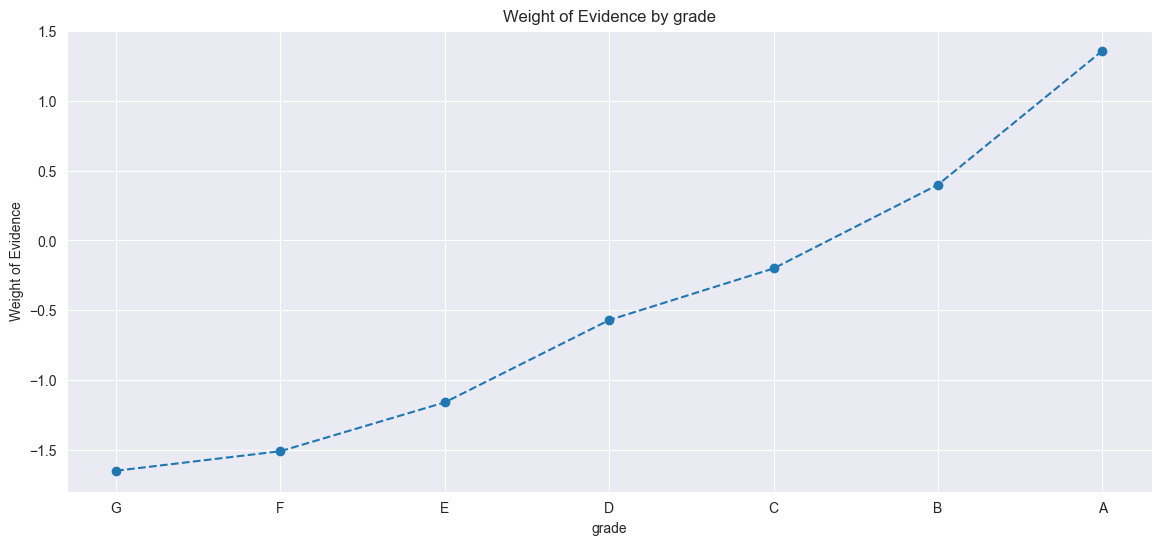

  home_ownership  prop_n_obs   WoE
3          other       0.006 -0.50
5           rent      39.405 -0.18
2           none       0.002 -0.11
4            own      11.326 -0.01
1       mortgage      49.139  0.16
0            any       0.122  0.46


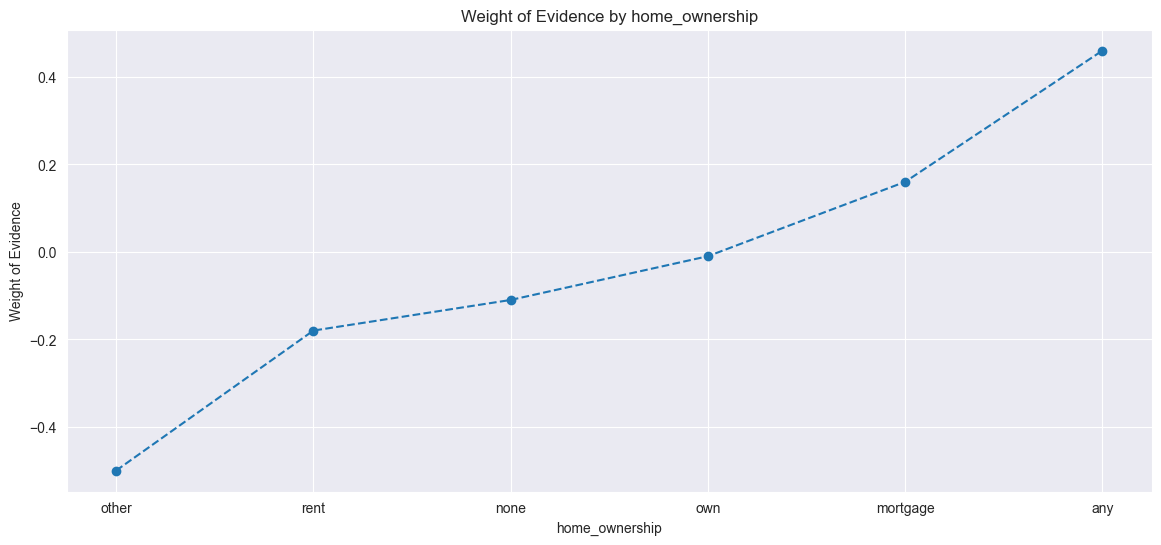

  verification_status  prop_n_obs   WoE
2            verified      24.506 -0.39
1     source verified      39.064 -0.05
0        not verified      36.429  0.41


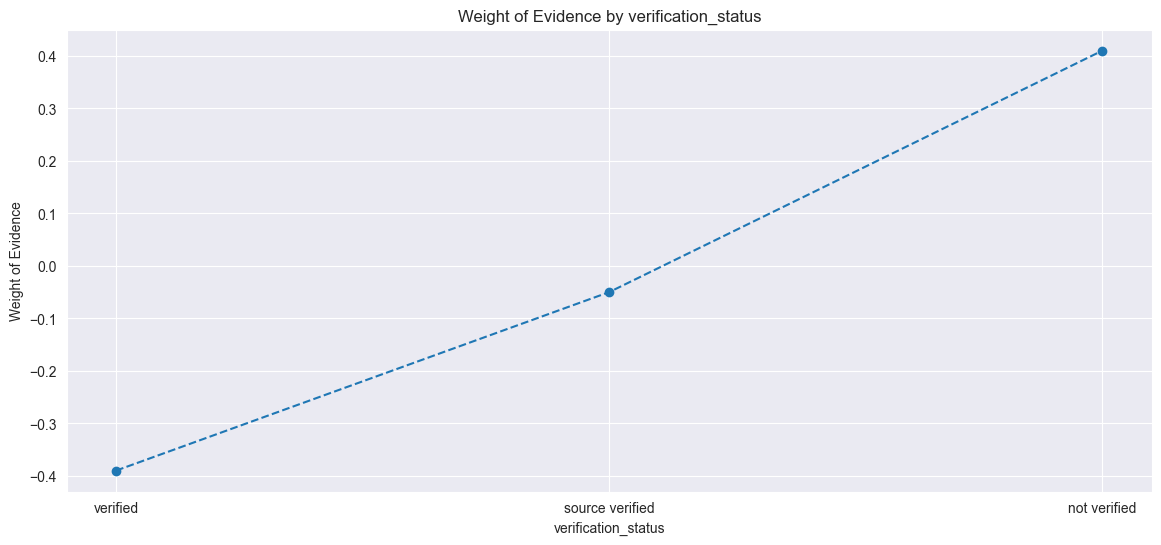

               purpose  prop_n_obs   WoE
3          educational       0.015 -0.55
11      small_business       1.030 -0.54
10    renewable_energy       0.060 -0.27
8               moving       0.659 -0.24
2   debt_consolidation      55.991 -0.09
7              medical       1.207 -0.06
5                house       0.666 -0.05
9                other       6.059 -0.04
6       major_purchase       2.142  0.01
12            vacation       0.689  0.05
13             wedding       0.082  0.07
4     home_improvement       6.594  0.13
1          credit_card      23.788  0.23
0                  car       1.019  0.29


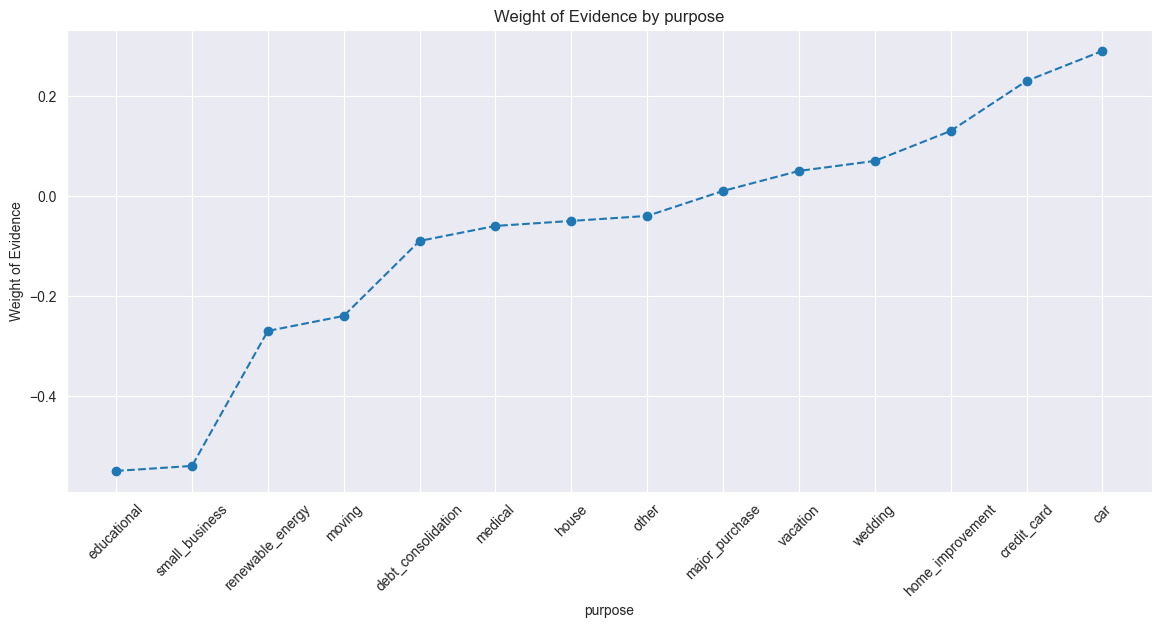

   addr_state  prop_n_obs   WoE
12         ia       0.000 -0.40
2          ar       0.759 -0.23
25         ms       0.573 -0.22
1          al       1.182 -0.20
36         ok       0.917 -0.18
33         nv       1.450 -0.16
18         la       1.116 -0.14
34         ny       8.100 -0.12
9          fl       7.253 -0.10
11         hi       0.461 -0.09
32         nm       0.531 -0.06
41         sd       0.202 -0.06
20         md       2.377 -0.06
38         pa       3.350 -0.04
15         in       1.664 -0.04
24         mo       1.598 -0.04
4          ca      13.840 -0.03
27         nc       2.781 -0.03
31         nj       3.653 -0.03
42         tn       1.602 -0.01
23         mn       1.732  0.00
22         mi       2.575  0.00
45         va       2.762  0.01
17         ky       0.974  0.01
43         tx       8.294  0.01
29         ne       0.377  0.01
3          az       2.409  0.02
0          ak       0.229  0.03
35         oh       3.303  0.03
8          de       0.290  0.04
19      

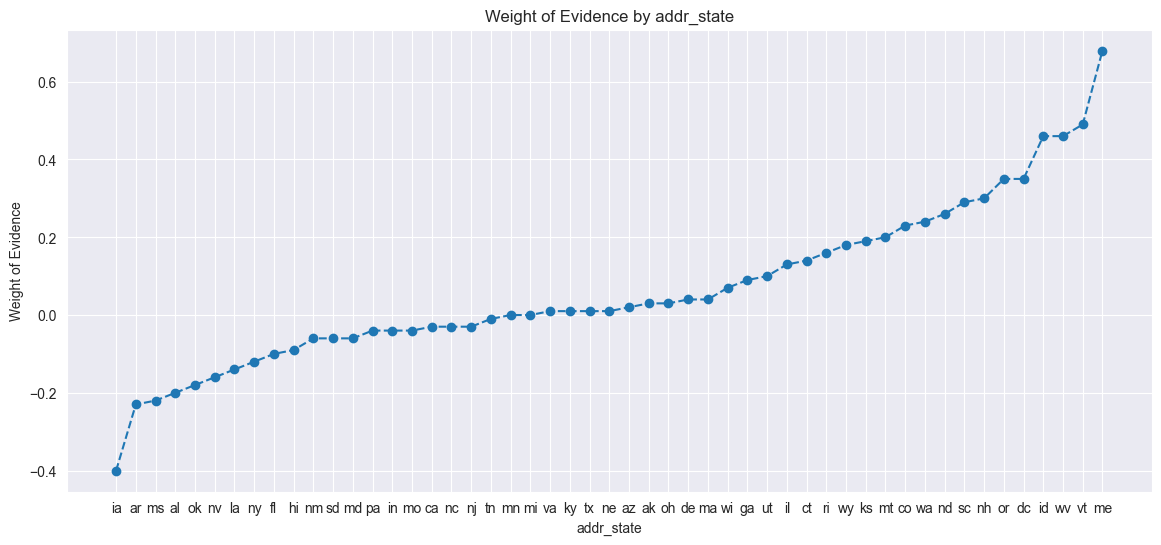

  initial_list_status  prop_n_obs   WoE
0                   f      26.872 -0.28
1                   w      73.128  0.12


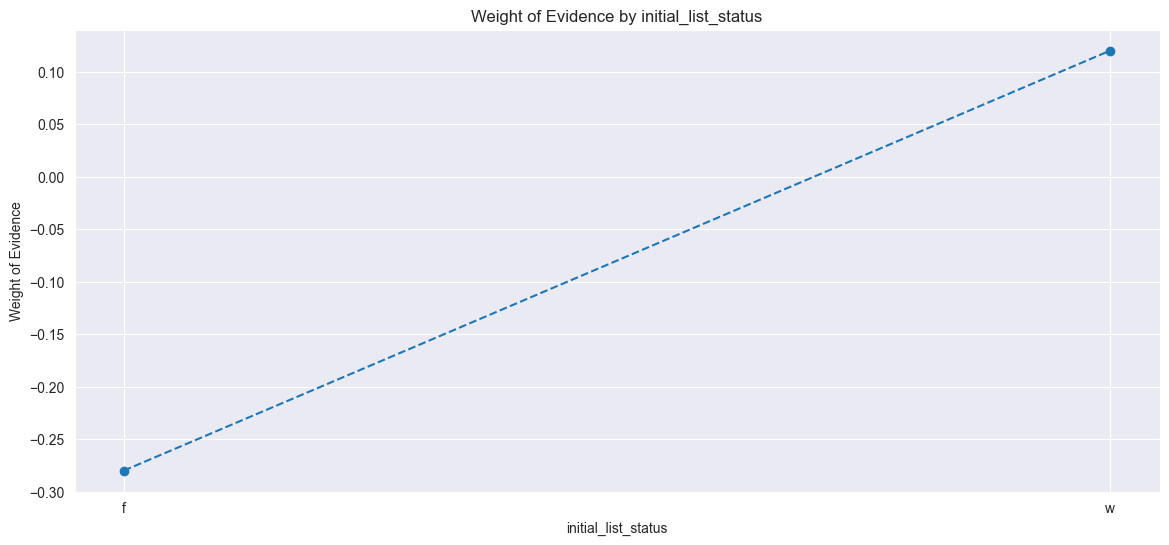

  application_type  prop_n_obs   WoE
0       individual      92.798 -0.03
1        joint app       7.202  0.39


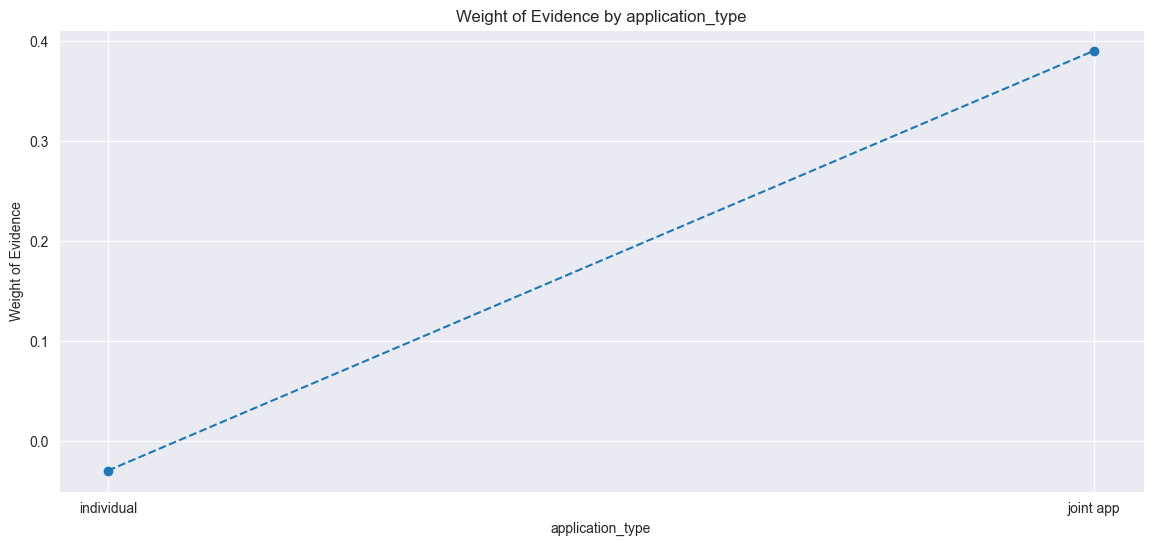

  hardship_flag  prop_n_obs   WoE
0             n      95.853 -0.05
1             y       4.147  3.76


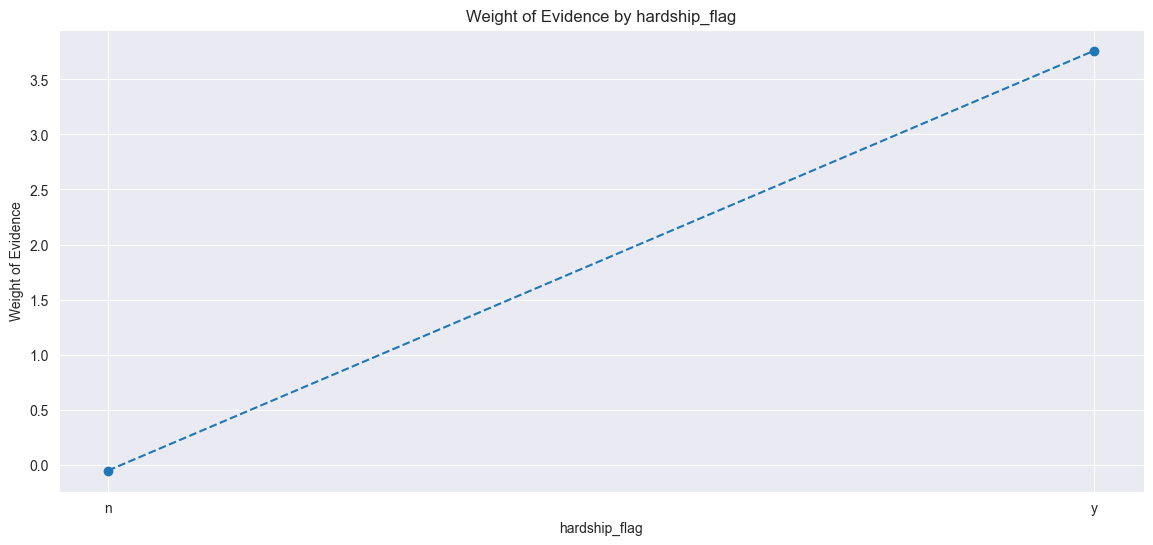

  debt_settlement_flag  prop_n_obs   WoE
1                    y       1.754 -8.26
0                    n      98.246  0.14


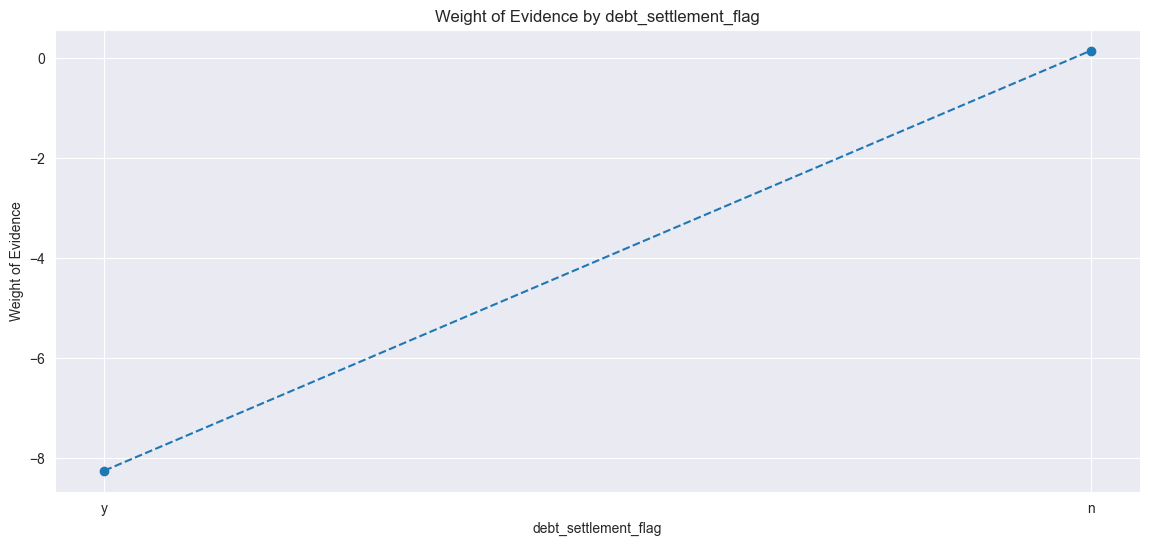

In [103]:
for col in cat_cols:
    df = woe_discrete(inputs_prep, col, "good_bad", targets_prep)
    df["prop_n_obs"] = df["prop_n_obs"].round(5) * 100
    df["WoE"] = df["WoE"].round(2)
    print(df.iloc[:, [0, 3, -2]])
    if col == "purpose":
        plot_by_woe(df, woe_col_name="WoE", x_rot=45)
    else:
        plot_by_woe(df, woe_col_name="WoE")

From above graphs and descriptions the following can be stayed:

* in `home_ownership` column values "other", "none", and "any" are underrepresented, and will be combined with "rent" value
* in `purpose` column values following categories will be combined:
    - "educational" and "small_business"
    - "renewable_energy", "moving", "medical"
    - "other", "house", "major_purchase"
    - "vacation", "wedding", "home_improvement"
* `sub_grade` provides the same information as `grade`, thus will be dropped
* `hardship_flag` and `debt_settlement_flag` contains two values, one from which is being underrepresented, thus those columns will be dropped

In [104]:
inputs_prep.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,delinq_2yrs,fico_range,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,application_type,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,total_bal_il,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,mnths_since_earliest_cr_line,mnths_since_last_pymnt_d,mnths_since_last_credit_pull_d,mnths_since_issue_d,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:any,home_ownership:mortgage,home_ownership:none,home_ownership:other,home_ownership:own,home_ownership:rent,verification_status:not verified,verification_status:source verified,verification_status:verified,purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:ak,addr_state:al,addr_state:ar,addr_state:az,addr_state:ca,addr_state:co,addr_state:ct,addr_state:dc,addr_state:de,addr_state:fl,addr_state:ga,addr_state:hi,addr_state:ia,addr_state:id,addr_state:il,addr_state:in,addr_state:ks,addr_state:ky,addr_state:la,addr_state:ma,addr_state:md,addr_state:me,addr_state:mi,addr_state:mn,addr_state:mo,addr_state:ms,addr_state:mt,addr_state:nc,addr_state:nd,addr_state:ne,addr_state:nh,addr_state:nj,addr_state:nm,addr_state:nv,addr_state:ny,addr_state:oh,addr_state:ok,addr_state:or,addr_state:pa,addr_state:ri,addr_state:sc,addr_state:sd,addr_state:tn,addr_state:tx,addr_state:ut,addr_state:va,addr_state:vt,addr_state:wa,addr_state:wi,addr_state:wv,addr_state:wy,initial_list_status:f,initial_list_status:w,application_type:individual,application_type:joint app,hardship_flag:n,hardship_flag:y,debt_settlement_flag:n,debt_settlement_flag:y
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
92797506,5000.0,5000.0,5000.0,36,19.99,185.80,D,10,mortgage,26400.0,verified,other,tx,6.55,0.0,695.0,0.0,7.0,0.0,151.0,4.9,10.0,f,0.00,6682.881293,1682.88,0.0,0.00,185.43,724.0,720.0,0.0,individual,283.0,163039.0,0.0,2.0,2.0,3.0,6811.0,0.0,0.0,0.0,63.0,3100.0,1.0,1.0,0.0,3.0,23291.0,0.0,0.0,0.0,86.0,27.0,9.0,3.0,0.0,3.0,0.0,1.0,0.0,0.0,5.0,2.0,2.0,1.0,7.0,0.0,2.0,70.0,0.0,0.0,182599.0,0.0,8009.0,n,n,243.533333,13.233333,7.166667,49.733333,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,True,False,True,False,True,False
139587342,21000.0,21000.0,21000.0,60,15.02,499.81,C,6,rent,106000.0,not verified,credit_card,ny,21.99,0.0,675.0,0.0,14.0,0.0,61294.0,81.0,15.0,w,0.00,8240.050000,2792.04,0.0,2672.04,499.81,499.0,0.0,0.0,individual,0.0,74192

In [105]:
def combine_cat(inputs, from_category, cats_to_combine, cat_sep=":"):
    dummies_to_drop = [f"{from_category + cat_sep + dtd}" for l in cats_to_combine for dtd in l]
    for cat_list in cats_to_combine:
        prefix = f"{from_category + cat_sep}"
        suffix = "".join(f"_{dummy}" for dummy in cat_list)
        new_dummy = prefix + suffix
        old_dummies = [from_category + cat_sep + cat for cat in cat_list]
        inputs[new_dummy] = inputs[old_dummies].sum(axis=1)

    print(from_category + " " + "dummy variables: ")

    cat_dummy_variables = [
        re.search(f"(^{from_category}.+)$", column).group(1) for column in inputs.columns.values if (re.search(f"(^{from_category}.+)$", column) and not(re.search(f"(^{from_category}.+)$", column).group(1) in dummies_to_drop))
    ]
    
    print(cat_dummy_variables)

    return inputs, cat_dummy_variables

In [106]:
inputs_prep, home_own_dummies = combine_cat(
    inputs_prep,
    "home_ownership",
    [
        ["other", "rent"],
        ["none", "own"],
        ["mortgage", "any"]
    ]
)

home_ownership dummy variables: 
['home_ownership:_other_rent', 'home_ownership:_none_own', 'home_ownership:_mortgage_any']


In [107]:
dummies_list = dummies_list + home_own_dummies

In [108]:
inputs_prep, purpose_dummies = combine_cat(
    inputs_prep,
    "purpose",
    [
        ["educational", "small_business", "renewable_energy", "moving"],
        ["medical", "house", "other"],
        ["major_purchase", "vacation", "wedding", "home_improvement"],
        ["credit_card", "car"]
    ]
)

purpose dummy variables: 
['purpose:debt_consolidation', 'purpose:_educational_small_business_renewable_energy_moving', 'purpose:_medical_house_other', 'purpose:_major_purchase_vacation_wedding_home_improvement', 'purpose:_credit_card_car']


In [109]:
dummies_list = dummies_list + purpose_dummies

In [110]:
inputs_prep, addr_state_dummies = combine_cat(
    inputs_prep,
    "addr_state",
    [
        ["ia", "ar", "ms", "al", "ok", "nv", "la"],
        ["hi", "nm", "sd", "md", "pa", "in", "mo"],
        ["nc", "nj", "tn", "mn", "mi", "va", "ky"],
        ["ne", "az", "ak", "oh", "de", "ma"],
        ["wi", "ga", "ut"],
        ["il", "ct", "ri", "wy", "ks", "mt"],
        ["co", "wa", "nd", "sc", "nh"],
        ["or", "dc", "id", "wv", "vt", "me"]
    ]
)       

addr_state dummy variables: 
['addr_state:ca', 'addr_state:fl', 'addr_state:ny', 'addr_state:tx', 'addr_state:_ia_ar_ms_al_ok_nv_la', 'addr_state:_hi_nm_sd_md_pa_in_mo', 'addr_state:_nc_nj_tn_mn_mi_va_ky', 'addr_state:_ne_az_ak_oh_de_ma', 'addr_state:_wi_ga_ut', 'addr_state:_il_ct_ri_wy_ks_mt', 'addr_state:_co_wa_nd_sc_nh', 'addr_state:_or_dc_id_wv_vt_me']


In [111]:
dummies_list = dummies_list + addr_state_dummies

In [112]:
inputs_prep.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,delinq_2yrs,fico_range,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,application_type,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,total_bal_il,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,mnths_since_earliest_cr_line,mnths_since_last_pymnt_d,mnths_since_last_credit_pull_d,mnths_since_issue_d,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:any,home_ownership:mortgage,home_ownership:none,home_ownership:other,home_ownership:own,home_ownership:rent,verification_status:not verified,verification_status:source verified,verification_status:verified,purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:ak,addr_state:al,addr_state:ar,addr_state:az,addr_state:ca,addr_state:co,addr_state:ct,addr_state:dc,addr_state:de,addr_state:fl,addr_state:ga,addr_state:hi,addr_state:ia,addr_state:id,addr_state:il,addr_state:in,addr_state:ks,addr_state:ky,addr_state:la,addr_state:ma,addr_state:md,addr_state:me,addr_state:mi,addr_state:mn,addr_state:mo,addr_state:ms,addr_state:mt,addr_state:nc,addr_state:nd,addr_state:ne,addr_state:nh,addr_state:nj,addr_state:nm,addr_state:nv,addr_state:ny,addr_state:oh,addr_state:ok,addr_state:or,addr_state:pa,addr_state:ri,addr_state:sc,addr_state:sd,addr_state:tn,addr_state:tx,addr_state:ut,addr_state:va,addr_state:vt,addr_state:wa,addr_state:wi,addr_state:wv,addr_state:wy,initial_list_status:f,initial_list_status:w,application_type:individual,application_type:joint app,hardship_flag:n,hardship_flag:y,debt_settlement_flag:n,debt_settlement_flag:y,home_ownership:_other_rent,home_ownership:_none_own,home_ownership:_mortgage_any,purpose:_educational_small_business_renewable_energy_moving,purpose:_medical_house_other,purpose:_major_purchase_vacation_wedding_home_improvement,purpose:_credit_card_car,addr_state:_ia_ar_ms_al_ok_nv_la,addr_state:_hi_nm_sd_md_pa_in_mo,addr_state:_nc_nj_tn_mn_mi_va_ky,addr_state:_ne_az_ak_oh_de_ma,addr_state:_wi_ga_ut,addr_state:_il_ct_ri_wy_ks_mt,addr_state:_co_wa_nd_sc_nh,addr_state:_or_dc_id_wv_vt_me
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
92797506,5000.0,5000.0,5000.0,36,19.99,185.80,D,10,mortgage,26400.0,verified,other,tx,6.55,0.0,695.0,0.0,7.0,0.0,151.0,4.9,10.0,f,0.00,6682.881293,1682.88,0.0,0.00,185.43,724.0,720.0,0.0,individual,283.0,163039.0,0.0,2.0,2.0,3.0,6811.0,0.0,0.0,0.0,63.0,3100.0,1.0,1.0,0.0,3.0,23291.0,0.0,0.0,0.0,86.0,27.0,9.0,3.0,0.0,3.0,0.0,1.0,0.0,0.0,5.0,2.0,2.0,1.0,7.0,0.0,2.0,70.0,0.0,0.0,182599.0,0.0,8009.0,n,n,243.533333,13.233333,7.166667,49.733333,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,F

In [113]:
def woe_ordered_continuous(inputs, discrete_variable_name, gb_col_name, gb_variable, threshold_less=None, threshold_more=None):
    df = pd.concat([inputs[discrete_variable_name], gb_variable], axis=1)
    if threshold_less:
        df = df[df[discrete_variable_name] < threshold_less]
    elif threshold_more:
        df = df[df[discrete_variable_name] > threshold_more]
    df = (df.groupby(discrete_variable_name)[gb_col_name]
             .agg(["count", "mean"])
             .reset_index()
             .rename(columns={"count": "n_obs", "mean": "prop_good"})
    )
    df["prop_n_obs"] = df["n_obs"] / df["n_obs"].sum()
    df["n_good"] = df["prop_good"] * df["n_obs"]
    df["n_bad"] = (1 - df["prop_good"]) * df["n_obs"]
    df["prop_n_good"] = df["n_good"] / df["n_good"].sum()
    df["prop_n_bad"] = df["n_bad"] / df["n_bad"].sum()
    df["WoE"] = np.log(df["prop_n_good"] / df["prop_n_bad"])
    df["IV"] = (df["prop_n_good"] - df["prop_n_bad"]) * df["WoE"]
    df["IV"] = df["IV"].sum()

    return df

In [ ]:
for col in cont_small_cols:
    df = woe_ordered_continuous(inputs_prep, col, "good_bad", targets_prep)
    df["prop_n_obs"] = df["prop_n_obs"].round(5) * 100
    df["WoE"] = df["WoE"].round(2)
    print(df.iloc[:, [0, 3, -2]])
    if df.size > 20:
        plot_by_woe(df, woe_col_name="WoE", x_rot=45)
    else:
        plot_by_woe(df, woe_col_name="WoE")

In [115]:
def create_cat_from_all_small_cont(inputs, cat_name, cat_sep=":"):
    cat_dummy_variables = []
    for val in inputs[cat_name].unique():
        inputs[f"{cat_name + cat_sep + str(val)}"] = np.where((inputs[cat_name] == val), 1, 0)
        cat_dummy_variables.append(f"{cat_name + cat_sep + str(val)}")

    return inputs, cat_dummy_variables

In [116]:
for cat in ["term", "verification_status", "initial_list_status", "application_type", "hardship_flag", "grade"]:
    inputs_prep, _dummies = create_cat_from_all_small_cont(inputs_prep, cat)
    dummies_list = dummies_list + _dummies

In [117]:
print(_dummies)

['grade:D', 'grade:C', 'grade:A', 'grade:B', 'grade:E', 'grade:F', 'grade:G']


In [118]:
def comb_cat_small_cont(inputs, from_category, val_ranges, last_moe=None, cat_sep=":"):
    cat_dummy_variables = []
    for val_range in val_ranges:
        try:
            len(val_range)
            inputs[f"{from_category + cat_sep + str(val_range[0])}-{val_range[-1]}"] = np.where((inputs[from_category].isin(val_range)), 1, 0)
            cat_dummy_variables.append(f"{from_category + cat_sep + str(val_range[0])}-{str(val_range[-1])}")
        except TypeError:
            if val_range == val_ranges[-1] and last_moe:
                inputs[f"{from_category + cat_sep + ">=" + str(val_range)}"] = np.where((inputs[from_category] >= val_range), 1, 0)
                cat_dummy_variables.append(f"{from_category + cat_sep + ">=" + str(val_range)}")
            else:
                inputs[f"{from_category + cat_sep + str(val_range)}"] = np.where((inputs[from_category] == val_range), 1, 0)
                cat_dummy_variables.append(f"{from_category + cat_sep + str(val_range)}")

    return inputs, cat_dummy_variables

In [119]:
inputs_prep, emp_length_dummies = comb_cat_small_cont(
    inputs_prep,
    "emp_length",
    
    [
        (0),
        (1),
        (2, 3, 4, 5, 6),
        (7),
        (8, 9),
        (10)
    ]
)

In [120]:
emp_length_dummies

['emp_length:0',
 'emp_length:1',
 'emp_length:2-6',
 'emp_length:7',
 'emp_length:8-9',
 'emp_length:10']

In [121]:
dummies_list = dummies_list + emp_length_dummies

In [122]:
inputs_prep, fico_range_dummies = comb_cat_small_cont(
    inputs_prep,
    "fico_range",
    [
        (range(610, 665, 5)),
        670,
        675,
        680,
        685,
        690,
        695,
        700,
        705,
        710,
        715,
        720,
        725,
        730,
        735,
        740,
        745,
        750,
        755,
        760,
        765,
        770,
        775,
        780,
        (range(785, 850, 5)),
    ]
)

In [123]:
fico_range_dummies

['fico_range:610-660',
 'fico_range:670',
 'fico_range:675',
 'fico_range:680',
 'fico_range:685',
 'fico_range:690',
 'fico_range:695',
 'fico_range:700',
 'fico_range:705',
 'fico_range:710',
 'fico_range:715',
 'fico_range:720',
 'fico_range:725',
 'fico_range:730',
 'fico_range:735',
 'fico_range:740',
 'fico_range:745',
 'fico_range:750',
 'fico_range:755',
 'fico_range:760',
 'fico_range:765',
 'fico_range:770',
 'fico_range:775',
 'fico_range:780',
 'fico_range:785-845']

In [124]:
inputs_prep, delinq_2y_dummies = comb_cat_small_cont(
    inputs_prep,
    "delinq_2yrs",
    [
        0,
        1,
        2
    ],
    last_moe=True
)

In [125]:
delinq_2y_dummies

['delinq_2yrs:0', 'delinq_2yrs:1', 'delinq_2yrs:>=2']

In [126]:
dummies_list = dummies_list + delinq_2y_dummies

In [127]:
inputs_prep, inq_last_6mths_dummies = comb_cat_small_cont(
    inputs_prep,
    "inq_last_6mths",
    [
        0,
        1,
        2,
        3,
        4
    ],
    last_moe=True
)

In [128]:
inq_last_6mths_dummies

['inq_last_6mths:0',
 'inq_last_6mths:1',
 'inq_last_6mths:2',
 'inq_last_6mths:3',
 'inq_last_6mths:>=4']

In [129]:
dummies_list = dummies_list + inq_last_6mths_dummies

In [130]:
inputs_prep, pub_rec_dummies = comb_cat_small_cont(
    inputs_prep,
    "pub_rec",
    [
        0,
        1,
        2
    ],
    last_moe=True
)

In [131]:
pub_rec_dummies

['pub_rec:0', 'pub_rec:1', 'pub_rec:>=2']

In [132]:
dummies_list = dummies_list + pub_rec_dummies

In [133]:
inputs_prep, collections_12_mths_ex_med_dummies = comb_cat_small_cont(
    inputs_prep,
    "collections_12_mths_ex_med",
    [
        0,
        1,
        2
    ],
    last_moe=True
)

In [134]:
collections_12_mths_ex_med_dummies

['collections_12_mths_ex_med:0',
 'collections_12_mths_ex_med:1',
 'collections_12_mths_ex_med:>=2']

In [135]:
dummies_list = dummies_list + collections_12_mths_ex_med_dummies

In [136]:
inputs_prep, open_acc_6m_dummies = comb_cat_small_cont(
    inputs_prep,
    "open_acc_6m",
    [
        0,
        1,
        2,
        3,
        4,
        5
    ],
    last_moe=True
)

In [137]:
open_acc_6m_dummies

['open_acc_6m:0',
 'open_acc_6m:1',
 'open_acc_6m:2',
 'open_acc_6m:3',
 'open_acc_6m:4',
 'open_acc_6m:>=5']

In [138]:
dummies_list = dummies_list + open_acc_6m_dummies

In [139]:
inputs_prep, open_il_12m_dummies = comb_cat_small_cont(
    inputs_prep,
    "open_il_12m",
    [
        0,
        1,
        2,
        3,
        4,
        5
    ],
    last_moe=True
)

In [140]:
open_il_12m_dummies

['open_il_12m:0',
 'open_il_12m:1',
 'open_il_12m:2',
 'open_il_12m:3',
 'open_il_12m:4',
 'open_il_12m:>=5']

In [141]:
dummies_list = dummies_list + open_il_12m_dummies

In [ ]:
inputs_prep, open_il_24m_dummies = comb_cat_small_cont(
    inputs_prep,
    "open_il_24m",
    [
        0,
        1,
        2,
        3,
        range(4, 7),
        range(7, 12),
        range(12, 17),
        17
    ],
    last_moe=True
)

In [143]:
open_il_24m_dummies

['open_il_24m:0',
 'open_il_24m:1',
 'open_il_24m:2',
 'open_il_24m:3',
 'open_il_24m:4-6',
 'open_il_24m:7-11',
 'open_il_24m:12-16',
 'open_il_24m:>=17']

In [144]:
dummies_list = dummies_list + open_il_24m_dummies

In [ ]:
inputs_prep, open_rv_12m_dummies = comb_cat_small_cont(
    inputs_prep,
    "open_rv_12m",
    [
        0,
        1,
        2,
        3,
        4,
        5,
        range(6, 12),
        12
    ],
    last_moe=True
)

In [146]:
open_rv_12m_dummies

['open_rv_12m:0',
 'open_rv_12m:1',
 'open_rv_12m:2',
 'open_rv_12m:3',
 'open_rv_12m:4',
 'open_rv_12m:5',
 'open_rv_12m:6-11',
 'open_rv_12m:>=12']

In [147]:
dummies_list = dummies_list + open_rv_12m_dummies

In [ ]:
inputs_prep, inq_fi_dummies = comb_cat_small_cont(
    inputs_prep,
    "inq_fi",
    [
        0,
        1,
        2,
        3,
        4,
        5,
        6,
        7,
        8
    ],
    last_moe=True
)

In [149]:
inq_fi_dummies

['inq_fi:0',
 'inq_fi:1',
 'inq_fi:2',
 'inq_fi:3',
 'inq_fi:4',
 'inq_fi:5',
 'inq_fi:6',
 'inq_fi:7',
 'inq_fi:>=8']

In [150]:
dummies_list = dummies_list + inq_fi_dummies

In [ ]:
inputs_prep, inq_last_12m_dummies = comb_cat_small_cont(
    inputs_prep,
    "inq_last_12m",
    [
        0,
        1,
        2,
        3,
        4,
        5,
        6,
        7,
        8,
        9,
        range(10, 15),
        15
    ],
    last_moe=True
)

In [152]:
inq_last_12m_dummies

['inq_last_12m:0',
 'inq_last_12m:1',
 'inq_last_12m:2',
 'inq_last_12m:3',
 'inq_last_12m:4',
 'inq_last_12m:5',
 'inq_last_12m:6',
 'inq_last_12m:7',
 'inq_last_12m:8',
 'inq_last_12m:9',
 'inq_last_12m:10-14',
 'inq_last_12m:>=15']

In [153]:
dummies_list = dummies_list + inq_last_12m_dummies

In [ ]:
inputs_prep, chargeoff_within_12_mths_dummies = comb_cat_small_cont(
    inputs_prep,
    "chargeoff_within_12_mths",
    [
        0,
        1,
        2
    ],
    last_moe=True
)

In [155]:
chargeoff_within_12_mths_dummies

['chargeoff_within_12_mths:0',
 'chargeoff_within_12_mths:1',
 'chargeoff_within_12_mths:>=2']

In [156]:
dummies_list = dummies_list + chargeoff_within_12_mths_dummies

In [ ]:
inputs_prep, mort_acc_dummies = comb_cat_small_cont(
    inputs_prep,
    "mort_acc",
    [
        0,
        1,
        2,
        3
    ],
    last_moe=True
)

In [158]:
mort_acc_dummies

['mort_acc:0', 'mort_acc:1', 'mort_acc:2', 'mort_acc:>=3']

In [159]:
dummies_list = dummies_list + mort_acc_dummies

In [ ]:
inputs_prep, num_tl_op_past_12m_dummies = comb_cat_small_cont(
    inputs_prep,
    "num_tl_op_past_12m",
    [
        0,
        1,
        2,
        3,
        4,
        5,
        6,
        7,
        8,
        range(9, 13),
        range(13, 17),
        17
    ],
    last_moe=True
)

In [161]:
num_tl_op_past_12m_dummies

['num_tl_op_past_12m:0',
 'num_tl_op_past_12m:1',
 'num_tl_op_past_12m:2',
 'num_tl_op_past_12m:3',
 'num_tl_op_past_12m:4',
 'num_tl_op_past_12m:5',
 'num_tl_op_past_12m:6',
 'num_tl_op_past_12m:7',
 'num_tl_op_past_12m:8',
 'num_tl_op_past_12m:9-12',
 'num_tl_op_past_12m:13-16',
 'num_tl_op_past_12m:>=17']

In [162]:
dummies_list = dummies_list + num_tl_op_past_12m_dummies

In [ ]:
inputs_prep, pub_rec_bankruptcies_dummies = comb_cat_small_cont(
    inputs_prep,
    "pub_rec_bankruptcies",
    [
        0,
        1,
        2,
        range(3, 6),
        6
    ],
    last_moe=True
)

In [164]:
pub_rec_bankruptcies_dummies

['pub_rec_bankruptcies:0',
 'pub_rec_bankruptcies:1',
 'pub_rec_bankruptcies:2',
 'pub_rec_bankruptcies:3-5',
 'pub_rec_bankruptcies:>=6']

In [165]:
dummies_list = dummies_list + pub_rec_bankruptcies_dummies

In [166]:
inputs_prep.head(10)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,delinq_2yrs,fico_range,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,application_type,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,total_bal_il,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,mnths_since_earliest_cr_line,mnths_since_last_pymnt_d,mnths_since_last_credit_pull_d,mnths_since_issue_d,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:any,home_ownership:mortgage,home_ownership:none,home_ownership:other,home_ownership:own,home_ownership:rent,verification_status:not verified,verification_status:source verified,verification_status:verified,purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:ak,addr_state:al,addr_state:ar,addr_state:az,addr_state:ca,addr_state:co,addr_state:ct,addr_state:dc,addr_state:de,addr_state:fl,addr_state:ga,addr_state:hi,addr_state:ia,addr_state:id,addr_state:il,addr_state:in,addr_state:ks,addr_state:ky,addr_state:la,addr_state:ma,addr_state:md,addr_state:me,addr_state:mi,addr_state:mn,addr_state:mo,addr_state:ms,addr_state:mt,addr_state:nc,addr_state:nd,addr_state:ne,addr_state:nh,addr_state:nj,addr_state:nm,addr_state:nv,addr_state:ny,addr_state:oh,addr_state:ok,addr_state:or,addr_state:pa,addr_state:ri,addr_state:sc,addr_state:sd,addr_state:tn,addr_state:tx,addr_state:ut,addr_state:va,addr_state:vt,addr_state:wa,addr_state:wi,addr_state:wv,addr_state:wy,initial_list_status:f,initial_list_status:w,application_type:individual,application_type:joint app,hardship_flag:n,hardship_flag:y,debt_settlement_flag:n,debt_settlement_flag:y,home_ownership:_other_rent,home_ownership:_none_own,home_ownership:_mortgage_any,purpose:_educational_small_business_renewable_energy_moving,purpose:_medical_house_other,purpose:_major_purchase_vacation_wedding_home_improvement,purpose:_credit_card_car,addr_state:_ia_ar_ms_al_ok_nv_la,addr_state:_hi_nm_sd_md_pa_in_mo,addr_state:_nc_nj_tn_mn_mi_va_ky,addr_state:_ne_az_ak_oh_de_ma,addr_state:_wi_ga_ut,addr_state:_il_ct_ri_wy_ks_mt,addr_state:_co_wa_nd_sc_nh,addr_state:_or_dc_id_wv_vt_me,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-6,emp_length:7,emp_length:8-9,emp_length:10,fico_range:610-660,fico_range:670,fico_range:675,fico_range:680,fico_range:685,fico_range:690,fico_range:695,fico_range:700,fico_range:705,fico_range:710,fico_range:715,fico_range:720,fico_range:725,fico_range:730,fico_range:735,fico_range:740,fico_range:745,fico_range:750,fico_range:755,fico_range:760,fico_range:765,fico_range:770,fico_range:775,fico_range:780,fico_range:785-845,delinq_2yrs:0,delinq_2yrs:1,delinq_2yrs:>=2,inq_last_6mths:0,inq_last_6mths:1,inq_last_6mths:2,inq_last_6mths:3,inq_last_6mths:>=4,pub_rec:0,pub_rec:1,pub_rec:>=2,collections_12_mths_ex_med:0,collections_12_mths_ex_med:1,collections_12_mths_ex_med:>=2,open_acc_6m:0,open_acc_6m:1,open_acc_6m:2,open_acc_6m:3,open_acc_6m:4,open_acc_6m:>=5,open_il_12m:0,open_il_12m:1,open_il_12m:2,open_il_12m:3

In [167]:
len(cont_small_cols)

21

In [ ]:
for col in cont_big_cols:
    inputs_prep[col + "_factor"] = pd.cut(inputs_prep[col], 50)

C:\Users\HARDPC\AppData\Local\Temp\ipykernel_19140\3554771784.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = (df.groupby(discrete_variable_name)[gb_col_name]


     int_rate_factor  prop_n_obs   WoE
0     (5.284, 5.824]       1.935  1.66
1     (5.824, 6.337]       1.694  1.54
2     (6.337, 6.851]       3.214  1.70
3     (6.851, 7.364]       4.247  1.25
4     (7.364, 7.878]       2.870  1.26
5     (7.878, 8.392]       6.710  0.86
6     (8.392, 8.905]       2.894  1.31
7     (8.905, 9.419]       1.674  0.32
8     (9.419, 9.932]       3.534  0.40
9    (9.932, 10.446]       4.059  0.66
10   (10.446, 10.96]       3.340  0.28
11   (10.96, 11.473]       4.991  0.32
12  (11.473, 11.987]       4.035  0.28
13    (11.987, 12.5]       4.954  0.14
14    (12.5, 13.014]       4.648 -0.20
15  (13.014, 13.528]       3.709  0.03
16  (13.528, 14.041]       4.842 -0.27
17  (14.041, 14.555]       4.111 -0.14
18  (14.555, 15.068]       3.481 -0.35
19  (15.068, 15.582]       1.907  0.09
20  (15.582, 16.096]       3.272 -0.59
21  (16.096, 16.609]       2.762 -0.27
22  (16.609, 17.123]       2.533 -0.38
23  (17.123, 17.636]       1.631 -0.68
24   (17.636, 18.15]     

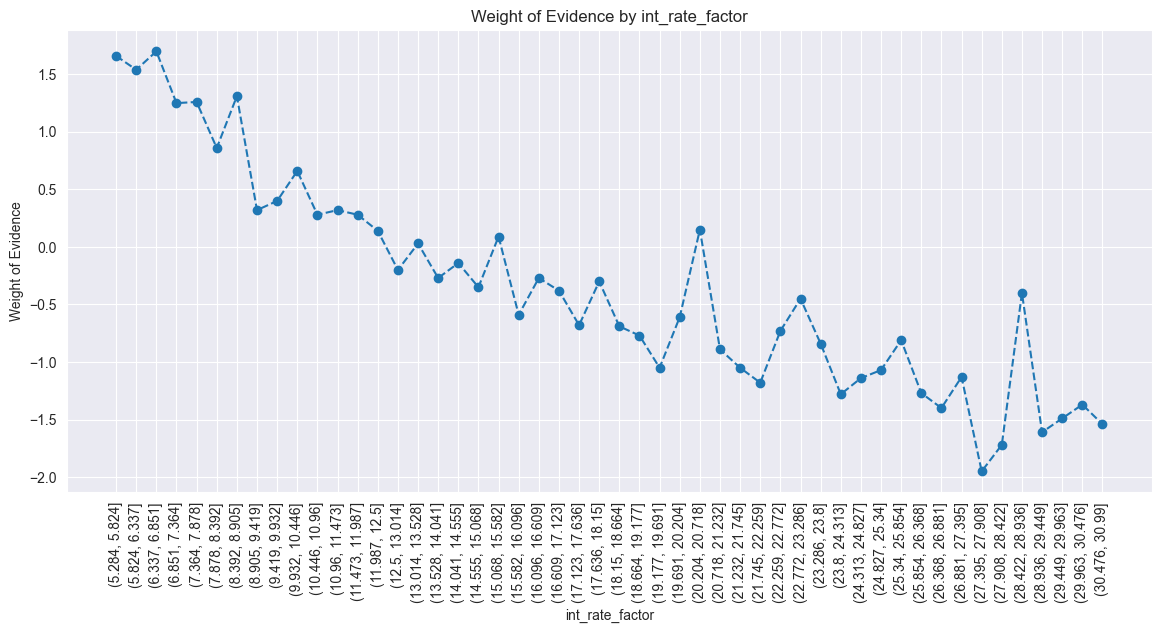

C:\Users\HARDPC\AppData\Local\Temp\ipykernel_19140\3554771784.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = (df.groupby(discrete_variable_name)[gb_col_name]
C:\Users\HARDPC\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


             annual_inc_factor  prop_n_obs   WoE
0       (-110000.0, 2200000.0]      99.988 -0.00
1       (2200000.0, 4400000.0]       0.004 -0.33
2       (4400000.0, 6600000.0]       0.004  0.40
3       (6600000.0, 8800000.0]       0.002  2.14
4      (8800000.0, 11000000.0]       0.001 -0.29
5     (11000000.0, 13200000.0]       0.000   NaN
6     (13200000.0, 15400000.0]       0.000   NaN
7     (15400000.0, 17600000.0]       0.000   NaN
8     (17600000.0, 19800000.0]       0.000   NaN
9     (19800000.0, 22000000.0]       0.000   NaN
10    (22000000.0, 24200000.0]       0.000   NaN
11    (24200000.0, 26400000.0]       0.000   NaN
12    (26400000.0, 28600000.0]       0.000   NaN
13    (28600000.0, 30800000.0]       0.000   NaN
14    (30800000.0, 33000000.0]       0.000   NaN
15    (33000000.0, 35200000.0]       0.000   NaN
16    (35200000.0, 37400000.0]       0.000   NaN
17    (37400000.0, 39600000.0]       0.000   NaN
18    (39600000.0, 41800000.0]       0.000   NaN
19    (41800000.0, 4

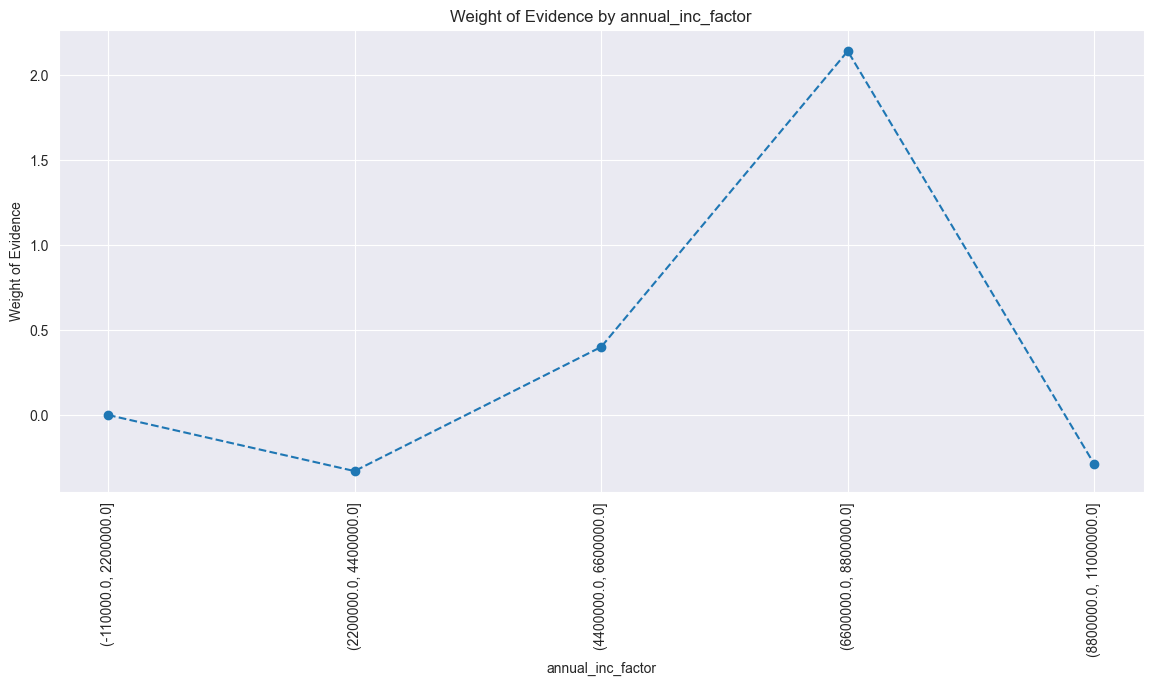

C:\Users\HARDPC\AppData\Local\Temp\ipykernel_19140\3554771784.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = (df.groupby(discrete_variable_name)[gb_col_name]


        total_pymnt_factor  prop_n_obs   WoE
0      (-67.174, 1343.488]       5.702 -0.13
1     (1343.488, 2686.975]       7.653 -0.37
2     (2686.975, 4030.463]       7.673 -0.47
3     (4030.463, 5373.951]       7.316 -0.50
4     (5373.951, 6717.438]       7.829 -0.26
5     (6717.438, 8060.926]       6.451 -0.32
6     (8060.926, 9404.413]       5.851 -0.24
7    (9404.413, 10747.901]       5.403 -0.12
8   (10747.901, 12091.389]       5.832  0.17
9   (12091.389, 13434.876]       4.433  0.08
10  (13434.876, 14778.364]       3.733  0.09
11  (14778.364, 16121.852]       3.212  0.16
12  (16121.852, 17465.339]       3.584  0.45
13  (17465.339, 18808.827]       2.846  0.40
14  (18808.827, 20152.315]       2.265  0.36
15  (20152.315, 21495.802]       2.242  0.53
16   (21495.802, 22839.29]       2.334  0.78
17   (22839.29, 24182.777]       1.905  0.76
18  (24182.777, 25526.265]       1.520  0.76
19  (25526.265, 26869.753]       1.481  0.92
20   (26869.753, 28213.24]       1.453  1.06
21   (2821

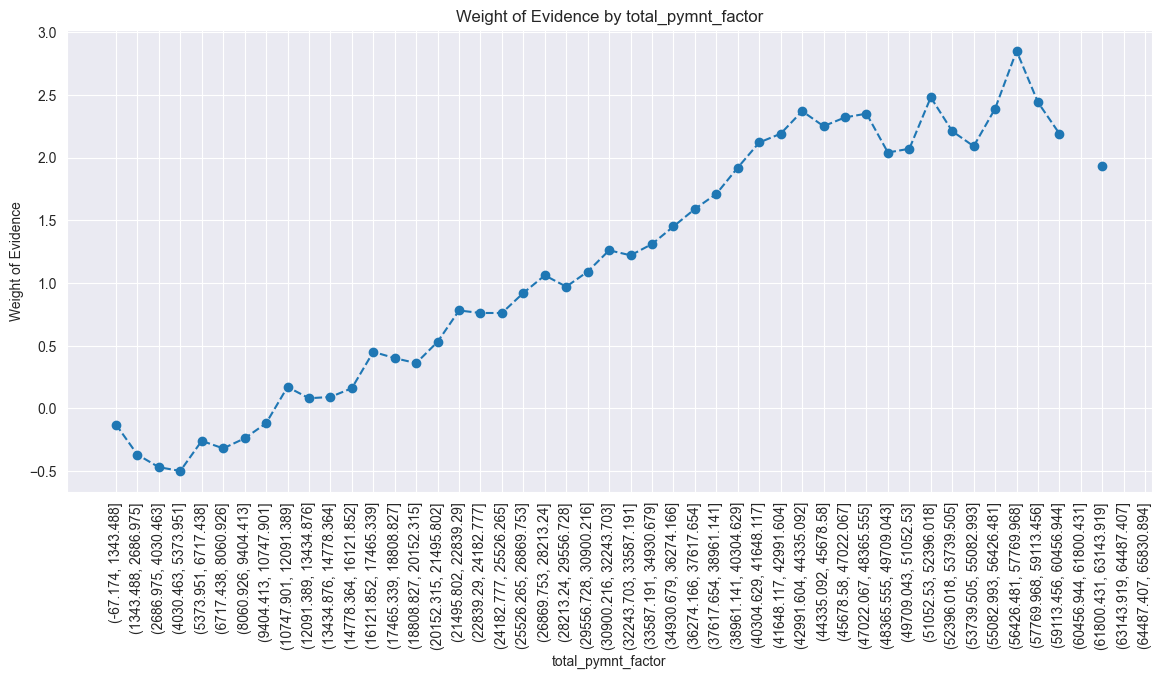

C:\Users\HARDPC\AppData\Local\Temp\ipykernel_19140\3554771784.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = (df.groupby(discrete_variable_name)[gb_col_name]


   mnths_since_earliest_cr_line_factor  prop_n_obs   WoE
0                      (40.64, 62.202]       0.263  1.60
1                     (62.202, 82.737]       1.476  0.48
2                    (82.737, 103.273]       2.491  0.21
3                   (103.273, 123.808]       3.267  0.08
4                   (123.808, 144.343]       3.802  0.10
5                   (144.343, 164.879]       6.378  0.07
6                   (164.879, 185.414]       9.701  0.01
7                   (185.414, 205.949]      10.765 -0.06
8                   (205.949, 226.485]      10.529 -0.07
9                    (226.485, 247.02]       9.194 -0.09
10                   (247.02, 267.555]       8.087 -0.06
11                  (267.555, 288.091]       6.441 -0.06
12                  (288.091, 308.626]       5.874 -0.04
13                  (308.626, 329.161]       4.639 -0.01
14                  (329.161, 349.697]       3.314  0.02
15                  (349.697, 370.232]       2.582  0.06
16                  (370.232, 3

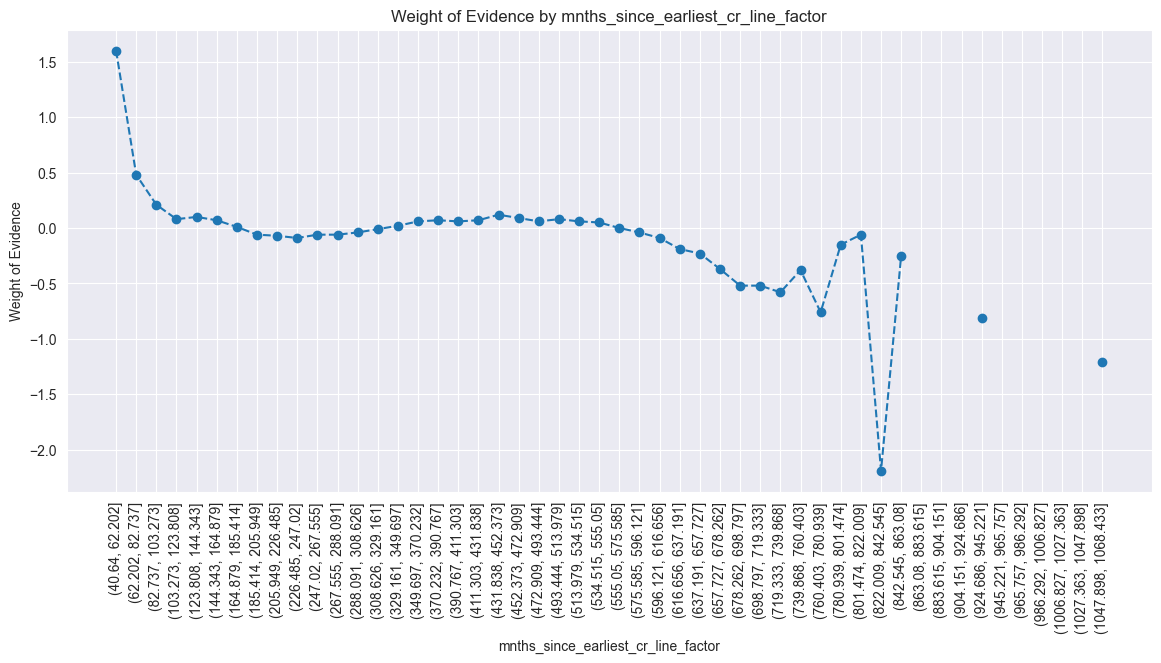

C:\Users\HARDPC\AppData\Local\Temp\ipykernel_19140\3554771784.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = (df.groupby(discrete_variable_name)[gb_col_name]


   mnths_since_last_pymnt_d_factor  prop_n_obs   WoE
0                  (-0.125, 3.199]       1.350  5.62
1                   (3.199, 6.365]       1.509  4.24
2                   (6.365, 9.531]      36.074  2.51
3                  (9.531, 12.697]       3.418 -0.27
4                 (12.697, 15.863]       3.602 -0.42
5                 (15.863, 19.029]       3.977 -0.57
6                 (19.029, 22.195]       4.033 -0.34
7                 (22.195, 25.361]       3.785 -0.37
8                 (25.361, 28.527]       4.900 -0.47
9                 (28.527, 31.693]       3.588 -0.45
10                (31.693, 34.859]       3.454 -0.36
11                (34.859, 38.025]       3.112 -0.57
12                (38.025, 41.191]       3.113 -0.66
13                (41.191, 44.357]       3.024 -0.64
14                (44.357, 47.523]       2.838 -0.59
15                (47.523, 50.689]       2.446 -0.75
16                (50.689, 53.855]       3.041 -0.91
17                (53.855, 57.021]       1.913

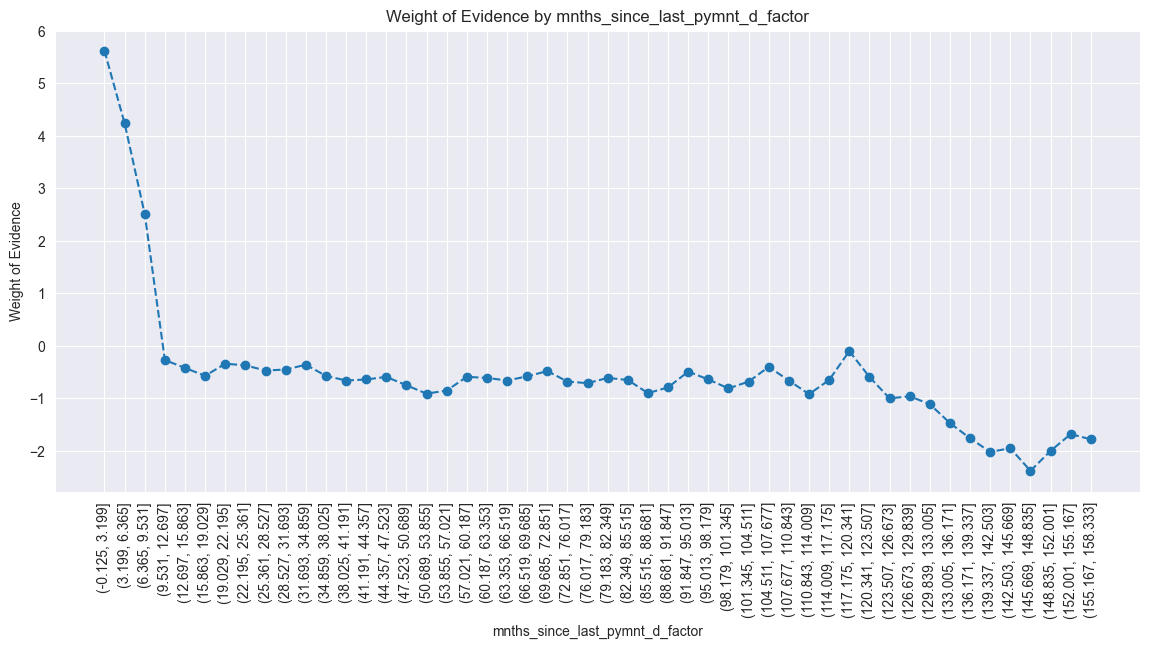

C:\Users\HARDPC\AppData\Local\Temp\ipykernel_19140\3554771784.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = (df.groupby(discrete_variable_name)[gb_col_name]


   mnths_since_issue_d_factor  prop_n_obs   WoE
0              (2.905, 6.294]       1.111  5.37
1              (6.294, 9.521]       1.249  4.17
2             (9.521, 12.749]       4.081  3.14
3            (12.749, 15.976]       4.492  2.05
4            (15.976, 19.203]       4.777  1.44
5            (19.203, 22.431]       5.538  0.90
6            (22.431, 25.658]       4.294  0.58
7            (25.658, 28.885]       4.496  0.39
8            (28.885, 32.113]       4.477  0.14
9             (32.113, 35.34]       3.915  0.03
10            (35.34, 38.567]       4.003 -0.05
11           (38.567, 41.795]       5.503 -0.21
12           (41.795, 45.022]       3.600 -0.26
13           (45.022, 48.249]       3.306 -0.26
14           (48.249, 51.477]       3.540 -0.33
15           (51.477, 54.704]       3.384 -0.46
16           (54.704, 57.931]       5.461 -0.43
17           (57.931, 61.159]       3.962 -0.46
18           (61.159, 64.386]       3.919 -0.41
19           (64.386, 67.613]       3.76

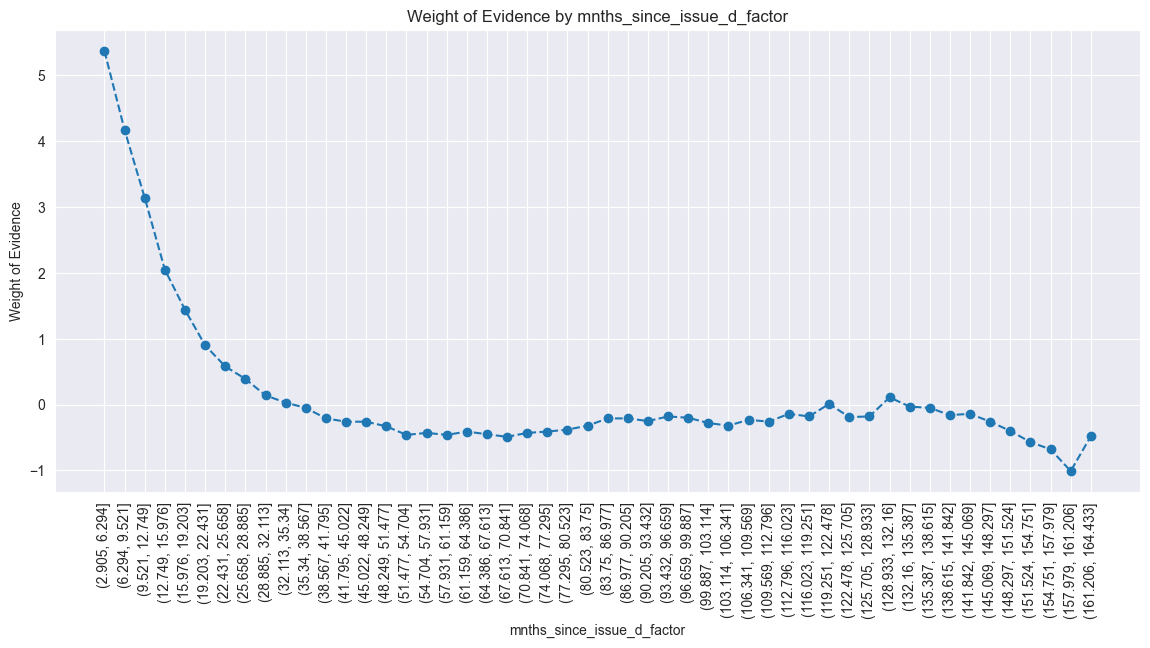

In [169]:
for col in cont_big_cols:
    df = woe_ordered_continuous(inputs_prep, col + "_factor", "good_bad", targets_prep)
    df["prop_n_obs"] = df["prop_n_obs"].round(5) * 100
    df["WoE"] = df["WoE"].round(2)
    print(df.iloc[:, [0, 3, -2]])
    plot_by_woe(df, woe_col_name="WoE", x_rot=90)

In [170]:
def comb_cat_big_cont(inputs, from_category, val_ranges, cat_sep=":"):
    cat_dummy_variables = []
    for val_range in val_ranges:
        try:
            len(val_range)
            inputs[f"{from_category + cat_sep + str(val_range[0])}-{str(val_range[1])}"] = np.where(((val_range[0] <= inputs[from_category]) & (inputs[from_category] < val_range[1])), 1, 0)
            cat_dummy_variables.append(f"{from_category + cat_sep + str(val_range[0])}-{str(val_range[1])}")
        except TypeError:
            if val_range != val_ranges[-1]:
                inputs[f"{from_category + cat_sep + "<" + str(val_range)}"] = np.where((inputs[from_category] < val_range), 1, 0)
                cat_dummy_variables.append(f"{from_category + cat_sep + "<" + str(val_range)}")
            else:
                inputs[f"{from_category + cat_sep + ">=" + str(val_range)}"] = np.where((inputs[from_category] >= val_range), 1, 0)
                cat_dummy_variables.append(f"{from_category + cat_sep + ">=" + str(val_range)}")

    return inputs, cat_dummy_variables

In [171]:
inputs_prep, int_rate_dummies = comb_cat_big_cont(
    inputs_prep,
    "int_rate",
    [
        6.9,
        (6.9, 7.3),
        (8.5, 9),
        (9, 12),
        (12, 15.6),
        (15.6, 19.2),
        (19.2, 24.0),
        24.0
    ]
)

C:\Users\HARDPC\AppData\Local\Temp\ipykernel_19140\3132875006.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  inputs[f"{from_category + cat_sep + "<" + str(val_range)}"] = np.where((inputs[from_category] < val_range), 1, 0)
C:\Users\HARDPC\AppData\Local\Temp\ipykernel_19140\3132875006.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  inputs[f"{from_category + cat_sep + str(val_range[0])}-{str(val_range[1])}"] = np.where(((val_range[0] <= inputs[from_category]) & (inputs[from_category] < val_range[1])), 1, 0)
C:\Users\HARD

In [172]:
int_rate_dummies

['int_rate:<6.9',
 'int_rate:6.9-7.3',
 'int_rate:8.5-9',
 'int_rate:9-12',
 'int_rate:12-15.6',
 'int_rate:15.6-19.2',
 'int_rate:19.2-24.0',
 'int_rate:>=24.0']

In [173]:
dummies_list = dummies_list + int_rate_dummies

In [ ]:
inputs_prep, total_pymnt_dummies = comb_cat_big_cont(
    inputs_prep,
    "total_pymnt",
    [
        1300.0,
        (1300.0, 5400.0),
        (5400.0, 10800.0),
        (10800, 16200),
        (16200, 20150),
        (20150, 21500),
        (21500, 22850),
        (22850, 25500),
        (25500, 28200),
        (28200, 32250),
        (32250, 35000),
        (35000, 36500),
        (36500, 38000),
        (39500, 41000),
        (42500, 44000),
        44000
    ]
)

In [175]:
total_pymnt_dummies

['total_pymnt:<1300.0',
 'total_pymnt:1300.0-5400.0',
 'total_pymnt:5400.0-10800.0',
 'total_pymnt:10800-16200',
 'total_pymnt:16200-20150',
 'total_pymnt:20150-21500',
 'total_pymnt:21500-22850',
 'total_pymnt:22850-25500',
 'total_pymnt:25500-28200',
 'total_pymnt:28200-32250',
 'total_pymnt:32250-35000',
 'total_pymnt:35000-36500',
 'total_pymnt:36500-38000',
 'total_pymnt:39500-41000',
 'total_pymnt:42500-44000',
 'total_pymnt:>=44000']

In [176]:
dummies_list = dummies_list + total_pymnt_dummies

In [ ]:
inputs_prep, mnths_since_earliest_cr_line_dummies = comb_cat_big_cont(
    inputs_prep,
    "mnths_since_earliest_cr_line",
    [
        130,
        (130, 185),
        (185, 350),
        (350, 555),
        (555, 660),
        (660, 760),
        760
    ]
)

In [178]:
mnths_since_earliest_cr_line_dummies

['mnths_since_earliest_cr_line:<130',
 'mnths_since_earliest_cr_line:130-185',
 'mnths_since_earliest_cr_line:185-350',
 'mnths_since_earliest_cr_line:350-555',
 'mnths_since_earliest_cr_line:555-660',
 'mnths_since_earliest_cr_line:660-760',
 'mnths_since_earliest_cr_line:>=760']

In [179]:
dummies_list = dummies_list + mnths_since_earliest_cr_line_dummies

In [ ]:
inputs_prep, mnths_since_last_pymnt_d_dummies = comb_cat_big_cont(
    inputs_prep,
    "mnths_since_last_pymnt_d",
    [
        6,
        (6, 8),
        (8, 10),
        (10, 35),
        (35, 100),
        100
    ]
)

In [181]:
mnths_since_last_pymnt_d_dummies

['mnths_since_last_pymnt_d:<6',
 'mnths_since_last_pymnt_d:6-8',
 'mnths_since_last_pymnt_d:8-10',
 'mnths_since_last_pymnt_d:10-35',
 'mnths_since_last_pymnt_d:35-100',
 'mnths_since_last_pymnt_d:>=100']

In [182]:
dummies_list = dummies_list + mnths_since_last_pymnt_d_dummies

In [ ]:
inputs_prep, mnths_since_issue_d_dummies = comb_cat_big_cont(
    inputs_prep,
    "mnths_since_issue_d",
    [
        6,
        (6, 10),
        (10, 13),
        (13, 16),
        (16, 20),
        (20, 22.5),
        (22.5, 29),
        (29, 39),
        (39, 52),
        (52, 84),
        (84, 120),
        120
    ]
)

In [184]:
mnths_since_issue_d_dummies

['mnths_since_issue_d:<6',
 'mnths_since_issue_d:6-10',
 'mnths_since_issue_d:10-13',
 'mnths_since_issue_d:13-16',
 'mnths_since_issue_d:16-20',
 'mnths_since_issue_d:20-22.5',
 'mnths_since_issue_d:22.5-29',
 'mnths_since_issue_d:29-39',
 'mnths_since_issue_d:39-52',
 'mnths_since_issue_d:52-84',
 'mnths_since_issue_d:84-120',
 'mnths_since_issue_d:>=120']

In [185]:
dummies_list = dummies_list + mnths_since_issue_d_dummies

C:\Users\HARDPC\AppData\Local\Temp\ipykernel_19140\469405689.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  inputs_prep["annual_inc" + "_factor_thl"] = pd.cut(inputs_prep[inputs_prep["annual_inc"] < 500000]["annual_inc"], 50)
C:\Users\HARDPC\AppData\Local\Temp\ipykernel_19140\3554771784.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = (df.groupby(discrete_variable_name)[gb_col_name]


     annual_inc_factor_thl  prop_n_obs   WoE
0      (-499.992, 9999.84]       0.264  0.25
1      (9999.84, 19999.68]       1.330 -0.26
2     (19999.68, 29999.52]       4.309 -0.26
3     (29999.52, 39999.36]       9.228 -0.22
4      (39999.36, 49999.2]      12.279 -0.16
5      (49999.2, 59999.04]      12.592 -0.09
6     (59999.04, 69998.88]      12.258 -0.05
7     (69998.88, 79998.72]      10.193  0.02
8     (79998.72, 89998.56]       8.292  0.06
9      (89998.56, 99998.4]       6.302  0.14
10    (99998.4, 109998.24]       5.073  0.21
11  (109998.24, 119998.08]       3.266  0.27
12  (119998.08, 129997.92]       3.544  0.21
13  (129997.92, 139997.76]       2.008  0.35
14   (139997.76, 149997.6]       1.546  0.33
15   (149997.6, 159997.44]       1.727  0.33
16  (159997.44, 169997.28]       1.010  0.40
17  (169997.28, 179997.12]       0.764  0.40
18  (179997.12, 189996.96]       0.722  0.39
19   (189996.96, 199996.8]       0.356  0.52
20   (199996.8, 209996.64]       0.648  0.47
21  (20999

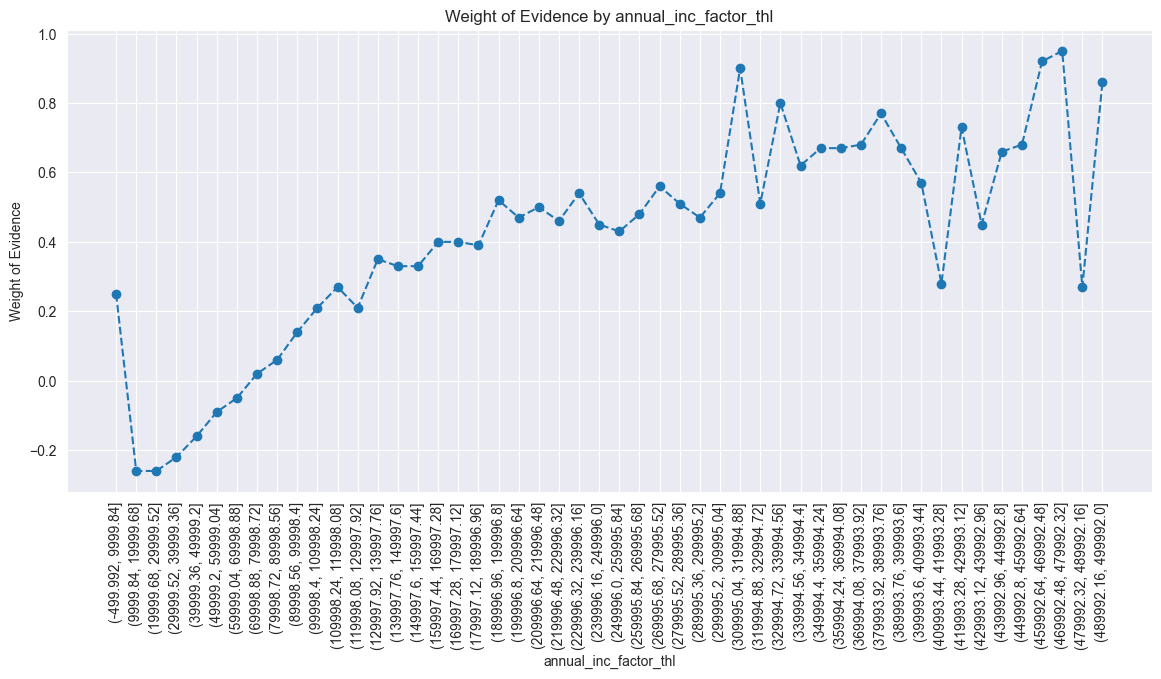

In [186]:
inputs_prep["annual_inc" + "_factor_thl"] = pd.cut(inputs_prep[inputs_prep["annual_inc"] < 500000]["annual_inc"], 50)
df = woe_ordered_continuous(inputs_prep, "annual_inc_factor_thl", "good_bad", targets_prep)
df["prop_n_obs"] = df["prop_n_obs"].round(5) * 100
df["WoE"] = df["WoE"].round(2)
print(df.iloc[:, [0, 3, -2]])
plot_by_woe(df, woe_col_name="WoE", x_rot=90)

In [ ]:
inputs_prep, annual_inc_dummies = comb_cat_big_cont(
    inputs_prep,
    "annual_inc",
    [
        7000,
        (7000, 12000),
        (12000, 17000),
        (17000, 22000),
        (22000, 27000),
        (27000, 32000),
        (32000, 37000),
        (37000, 42000),
        (42000, 47000),
        (47000, 52000),
        (52000, 57000),
        (57000, 62000),
        (62000, 67000),
        (67000, 72000),
        (72000, 77000),
        (77000, 82000),
        (82000, 87000),
        (87000, 92000),
        (92000, 97000),
        (97000, 102000),
        (102000, 107000),
        (107000, 112000),
        (112000, 186000),
        (186000, 297500),
        (297500, 346000),
        (346000, 450000),
        450000  
    ]
)

In [188]:
annual_inc_dummies

['annual_inc:<7000',
 'annual_inc:7000-12000',
 'annual_inc:12000-17000',
 'annual_inc:17000-22000',
 'annual_inc:22000-27000',
 'annual_inc:27000-32000',
 'annual_inc:32000-37000',
 'annual_inc:37000-42000',
 'annual_inc:42000-47000',
 'annual_inc:47000-52000',
 'annual_inc:52000-57000',
 'annual_inc:57000-62000',
 'annual_inc:62000-67000',
 'annual_inc:67000-72000',
 'annual_inc:72000-77000',
 'annual_inc:77000-82000',
 'annual_inc:82000-87000',
 'annual_inc:87000-92000',
 'annual_inc:92000-97000',
 'annual_inc:97000-102000',
 'annual_inc:102000-107000',
 'annual_inc:107000-112000',
 'annual_inc:112000-186000',
 'annual_inc:186000-297500',
 'annual_inc:297500-346000',
 'annual_inc:346000-450000',
 'annual_inc:>=450000']

In [189]:
dummies_list = dummies_list + annual_inc_dummies

In [190]:
dummies_list

['home_ownership:_other_rent',
 'home_ownership:_none_own',
 'home_ownership:_mortgage_any',
 'purpose:debt_consolidation',
 'purpose:_educational_small_business_renewable_energy_moving',
 'purpose:_medical_house_other',
 'purpose:_major_purchase_vacation_wedding_home_improvement',
 'purpose:_credit_card_car',
 'addr_state:ca',
 'addr_state:fl',
 'addr_state:ny',
 'addr_state:tx',
 'addr_state:_ia_ar_ms_al_ok_nv_la',
 'addr_state:_hi_nm_sd_md_pa_in_mo',
 'addr_state:_nc_nj_tn_mn_mi_va_ky',
 'addr_state:_ne_az_ak_oh_de_ma',
 'addr_state:_wi_ga_ut',
 'addr_state:_il_ct_ri_wy_ks_mt',
 'addr_state:_co_wa_nd_sc_nh',
 'addr_state:_or_dc_id_wv_vt_me',
 'term:36',
 'term:60',
 'verification_status:verified',
 'verification_status:not verified',
 'verification_status:source verified',
 'initial_list_status:f',
 'initial_list_status:w',
 'application_type:individual',
 'application_type:joint app',
 'hardship_flag:n',
 'hardship_flag:y',
 'grade:D',
 'grade:C',
 'grade:A',
 'grade:B',
 'grade:E'

In [191]:
#loans_inputs_train = inputs_prep

In [192]:
#loans_targets_train = targets_prep

In [193]:
#loans_inputs_train.to_csv("loans_inputs_train.csv")

In [194]:
#loans_targets_train.to_csv("loans_targets_train.csv")

In [195]:
#loans_inputs_test = inputs_prep

In [196]:
#loans_targets_test = targets_prep

In [197]:
#loans_inputs_test.to_csv("loans_inputs_test.csv")

In [198]:
#loans_targets_test.to_csv("loans_targets_test.csv")

In [199]:
#inputs_prep.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,delinq_2yrs,fico_range,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,application_type,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,total_bal_il,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,mnths_since_earliest_cr_line,mnths_since_last_pymnt_d,mnths_since_last_credit_pull_d,mnths_since_issue_d,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:any,home_ownership:mortgage,home_ownership:none,home_ownership:other,home_ownership:own,home_ownership:rent,verification_status:not verified,verification_status:source verified,verification_status:verified,purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:ak,addr_state:al,addr_state:ar,addr_state:az,addr_state:ca,addr_state:co,addr_state:ct,addr_state:dc,addr_state:de,addr_state:fl,addr_state:ga,addr_state:hi,addr_state:ia,addr_state:id,addr_state:il,addr_state:in,addr_state:ks,addr_state:ky,addr_state:la,addr_state:ma,addr_state:md,addr_state:me,addr_state:mi,addr_state:mn,addr_state:mo,addr_state:ms,addr_state:mt,addr_state:nc,addr_state:nd,addr_state:ne,addr_state:nh,addr_state:nj,addr_state:nm,addr_state:nv,addr_state:ny,addr_state:oh,addr_state:ok,addr_state:or,addr_state:pa,addr_state:ri,addr_state:sc,addr_state:sd,addr_state:tn,addr_state:tx,addr_state:ut,addr_state:va,addr_state:vt,addr_state:wa,addr_state:wi,addr_state:wv,addr_state:wy,initial_list_status:f,initial_list_status:w,application_type:individual,application_type:joint app,hardship_flag:n,hardship_flag:y,debt_settlement_flag:n,debt_settlement_flag:y,home_ownership:_other_rent,home_ownership:_none_own,home_ownership:_mortgage_any,purpose:_educational_small_business_renewable_energy_moving,purpose:_medical_house_other,purpose:_major_purchase_vacation_wedding_home_improvement,purpose:_credit_card_car,addr_state:_ia_ar_ms_al_ok_nv_la,addr_state:_hi_nm_sd_md_pa_in_mo,addr_state:_nc_nj_tn_mn_mi_va_ky,addr_state:_ne_az_ak_oh_de_ma,addr_state:_wi_ga_ut,addr_state:_il_ct_ri_wy_ks_mt,addr_state:_co_wa_nd_sc_nh,addr_state:_or_dc_id_wv_vt_me,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-6,emp_length:7,emp_length:8-9,emp_length:10,fico_range:610-660,fico_range:670,fico_range:675,fico_range:680,fico_range:685,fico_range:690,fico_range:695,fico_range:700,fico_range:705,fico_range:710,fico_range:715,fico_range:720,fico_range:725,fico_range:730,fico_range:735,fico_range:740,fico_range:745,fico_range:750,fico_range:755,fico_range:760,fico_range:765,fico_range:770,fico_range:775,fico_range:780,fico_range:785-845,delinq_2yrs:0,delinq_2yrs:1,delinq_2yrs:>=2,inq_last_6mths:0,inq_last_6mths:1,inq_last_6mths:2,inq_last_6mths:3,inq_last_6mths:>=4,pub_rec:0,pub_rec:1,pub_rec:>=2,collections_12_mths_ex_med:0,collections_12_mths_ex_med:1,collections_12_mths_ex_med:>=2,open_acc_6m:0,open_acc_6m:1,open_acc_6m:2,open_acc_6m:3,open_acc_6m:4,open_acc_6m:>=5,open_il_12m:0,open_il_12m:1,open_il_12m:2,open_il_12m:3